# Ideology and Public Trust in China

In [1]:
import pandas as pd
import numpy as np
import pyreadr
from plotnine import *
import missingno as miss
import matplotlib.pyplot as plt
import math
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
dat= pyreadr.read_r('data/sample10k.RData')
dat= dat['d']

PyreadrError: File data/sample10k.RData does not exist!

In [3]:
dat= dat.drop(columns= dat.columns[-7:])
dat= dat.reset_index().drop(columns= ["rownames", 'id1', 'id2'], axis=1)
dat.head()

ipwgt  year  month  day        date  newdate  provgb  overseas  gender  \
0  1.000000  2012     10    8  2012-10-08    282.0    11.0       0.0       1   
1  0.333333  2012      9    8  2012-09-08    252.0    15.0       0.0       1   
2  1.000000  2012      4   13  2012-04-13    104.0    33.0       0.0       0   
3  1.000000  2012      3   21  2012-03-21     81.0    44.0       0.0       0   
4  1.000000  2013      5   13  2013-05-13    499.0    33.0       0.0       0   

   birthyear  ...  q40  q47  q42  q43  q49  q45  q48  q41  q44  q50  
0       1983  ...    2    3    4    3    3    1    2    1    1    1  
1       1980  ...    3    3    4    2    3    2    3    1    3    3  
2       1970  ...    3    3    2    3    3    2    1    1    2    3  
3       1978  ...    3    2    2    2    3    2    1    3    3    4  
4       1970  ...    1    1    4    3    3    3    3    1    4    3  

[5 rows x 63 columns]

### Missingness

<AxesSubplot:>

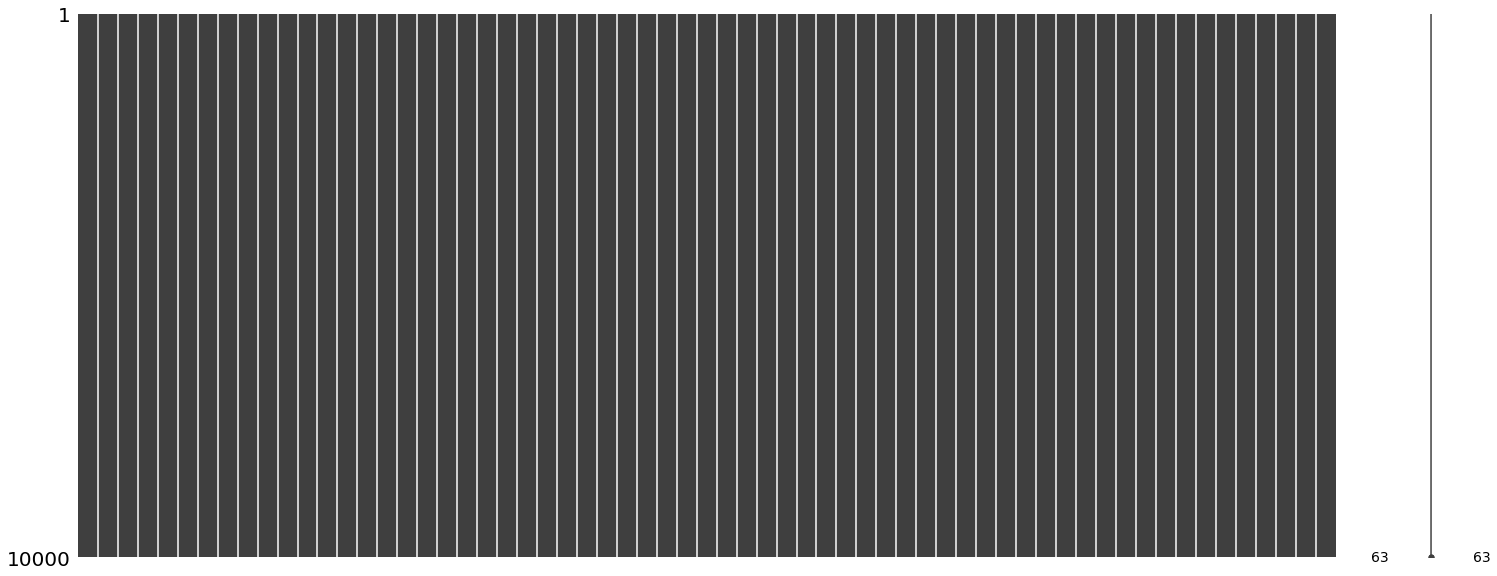

In [4]:
miss.matrix(dat)

### Visualization

In [5]:
viz= dat.copy()

In [6]:
## Make graph more tidy 
education= list()
for i in viz.educ:
    if i==1:
        education.append("Below High School")
    elif i==2:
        education.append("High School")
    elif i==3:
        education.append("College")
    else: 
        education.append("Above College")
        
viz['Education']= education

In [7]:
income= list()
for i in viz.income:
    if i<=2:
        income.append("0-50k")
    elif i>2 and i<=4:
        income.append("50-100k")
    elif i==5:
        income.append("100-150k")
    elif i==6:
        income.append("150-300k")
    else: 
        income.append("Above 300k")

viz['Income']= income

In [8]:
for col in ["Education", "Income", 'q5', 'q3']:
      viz[col] = viz[col].astype('category')

In [9]:
d= viz[["Education", "Income", 'q3','q5']].select_dtypes(include="category").melt()

In [10]:
p= (ggplot(d, aes(x="value")) +
     geom_bar() +
     facet_wrap("variable",scales='free') +
     theme_minimal()+
     theme(panel_grid=element_line(color= "white"),
           figure_size=(15,7),
           subplots_adjust={'wspace':0.25,
                            'hspace':0.75},
           axis_text_x=element_text(color= 'black', rotation=45, hjust=1))

)
p.save("visualizations/barplot.png", dpi=400)

# Preprocessing

### `educ`

In [11]:
edu_dummies= pd.get_dummies(dat.educ)
edu_dummies.columns= ["bhs", "hs", "college", "above_college"]

In [12]:
dat= pd.concat([dat.drop(['educ'],axis=1),edu_dummies], axis=1)

### `Income`

In [13]:
## create income dummies
i0_50k = [1 if i<= 2 else 0 for i in dat.income]
i50_100k= [1 if i>2 and i<=4 else 0 for i in dat.income]
i100_150k = [1 if i== 5 else 0 for i in dat.income]
i150_300k= [1 if i==6 else 0 for i in dat.income]
ia300k = [1 if i== 7 else 0 for i in dat.income]

In [14]:
inc= pd.DataFrame()
for i in [i0_50k, i50_100k, i100_150k, i150_300k, ia300k]:
    output= pd.DataFrame(i)
    inc= pd.concat([inc, output], axis=1)

inc.columns= ['i0_50k', 'i50_100k', 'i100_150k', 'i150_300k', 'ia300k']

In [15]:
inc.sum()/len(inc)

i0_50k       0.4373
i50_100k     0.3848
i100_150k    0.0416
i150_300k    0.0873
ia300k       0.0490
dtype: float64

In [16]:
dat= pd.concat([dat.drop(columns= ['income'], axis=1), inc], axis=1)

###  `provgb`

In [17]:
## create region dummies
north= [1 if i in range(10,20) else 0 for i in dat.provgb]
northeast= [1 if i in range(20,30) else 0 for i in dat.provgb]
east= [1 if i in range(30,40) else 0 for i in dat.provgb]
southcentral= [1 if i in range(40,50) else 0 for i in dat.provgb]
southwest= [1 if i in range(50,60) else 0 for i in dat.provgb]
northwest= [1 if i in range(60,70) else 0 for i in dat.provgb]

In [18]:
region= pd.DataFrame()
for i in [north, northeast, east, southcentral, southwest, northwest]:
    output= pd.DataFrame(i)
    region= pd.concat([region, output], axis=1)

## Adjust the column name
region.columns= ['north', 'northeast', 'east', 'southcentral', 'southwest', 'northwest']

In [19]:
## Get the ratio of each region
region.sum()/len(region)

north           0.1387
northeast       0.1130
east            0.3153
southcentral    0.2935
southwest       0.0889
northwest       0.0506
dtype: float64

In [20]:
dat= pd.concat([dat.drop(columns= ['provgb'], axis=1), region], axis=1)

In [21]:
dat.head()

ipwgt  year  month  day        date  newdate  overseas  gender  \
0  1.000000  2012     10    8  2012-10-08    282.0       0.0       1   
1  0.333333  2012      9    8  2012-09-08    252.0       0.0       1   
2  1.000000  2012      4   13  2012-04-13    104.0       0.0       0   
3  1.000000  2012      3   21  2012-03-21     81.0       0.0       0   
4  1.000000  2013      5   13  2013-05-13    499.0       0.0       0   

   birthyear  age  ...  i50_100k  i100_150k  i150_300k  ia300k  north  \
0       1983   29  ...         1          0          0       0      1   
1       1980   32  ...         1          0          0       0      1   
2       1970   42  ...         1          0          0       0      0   
3       1978   34  ...         0          0          1       0      0   
4       1970   43  ...         1          0          0       0      0   

   northeast  east  southcentral  southwest  northwest  
0          0     0             0          0          0  
1          0     0             0          0          0  
2          0     1             0          0          0  
3          0     0             1          0          0  
4          0     1             0          0          0  

[5 rows x 75 columns]

### Binary scale

In [22]:
dat= dat.drop(columns= dat.columns[: 7], axis=1)

In [23]:
dat_bi= dat.copy()

## Transfer categorical variables to binary scale
for i in range(50):
    colname= str('q')+ str(i+1)
    dat_bi[colname]= 1*(dat_bi[colname] > 2.5)

In [24]:
dat_bi['i0']= np.where((dat_bi['q3']+ dat_bi['q5']==0), 1, 0)
dat_bi['i01']= np.where(dat_bi['q3']< dat_bi['q5'], 1, 0)
dat_bi['i10']= np.where(dat_bi['q3']> dat_bi['q5'], 1, 0)
dat_bi['i2']= np.where(dat_bi['q3']+ dat_bi['q5']==2, 1, 0)

In [25]:
dat_bi['overlap']= dat_bi['college']+ dat_bi['above_college']+ dat_bi['i150_300k']
print(dat_bi['college'].value_counts(), dat_bi['above_college'].value_counts())

1    6721
0    3279
Name: college, dtype: int64 0    8380
1    1620
Name: above_college, dtype: int64


In [26]:
dat_bi['overlap'].value_counts()[2]/dat_bi['i150_300k'].value_counts()[1]

0.9392898052691867

In [27]:
dat_bi= dat_bi.drop(columns= ["overlap"], axis=1)

### Index

In [28]:
## Political Institutions (PI) includes Q1,2,3,4,5,10,12,13,14,17
## Pro-democracy direction is 1, pro-authoritarianism is -1
## Deduct 2.5 for every question to make sure the midpoint is 0

pi= dat[['q2','q4','q1','q10','q12','q13','q14','q17']]- 2.5 
pi_index= pi['q2']- pi['q4']+ pi['q1']- pi['q10']+ pi['q12']- pi['q13']+ pi['q14']+ pi['q17']

In [29]:
## Individual Freedom (fr) includes Q6,7,8,24,44,45
## Pro-freedom (+1), anti-freedom(-1)
fr= dat[['q6','q7','q8','q24','q44','q45']]-2.5
fr_index= fr['q6']+ fr['q7']- fr['q8']+ fr['q24']- fr['q44']+ fr['q45']

In [30]:
## Free Market (fm) includes Q21,25,27,29,30,37,40
fm= dat[['q21','q25','q27','q29','q30','q37','q40']]-2.5
fm_index= -0.5*fm['q21']- fm['q25']- fm['q27']+ fm['q29']- fm['q30']+ fm['q37']+ 0.5*fm['q40']

In [31]:
## Labor vs Capital (soc) includes Q22,31,33,34,36,38
## Pro-Socialism (+1), anti-Socialism(-1)
soc= dat[['q22','q31','q32','q33','q34','q36','q38']]- 2.5
soc_index= (soc['q22']- soc['q31']+ soc['q32']+ soc['q33']- soc['q34']- soc['q36']+ soc['q38'])

In [32]:
## Globalization (GLO) includes Q23,26,28,35,39
## Pro-globalization (+1), anti-globalization (-1)
glo= dat[['q11','q23','q26','q28','q35','q39']]- 2.5
glo_index= glo['q11']- glo['q23']- glo['q26']+ glo['q39']- glo['q28']- glo['q35']

In [33]:
## Traditionalism (TR) includes Q41,42,43,46,47,48,49,50
## Pro-tradition (+1), pro-modernization(-1)
tr= dat[['q41','q42','q43','q46','q47','q48','q49','q50']]- 2.5
tr_index= -(tr['q41']-tr['q42']- tr['q43']- tr['q46']- tr['q47']- tr['q48']- tr['q49']+ tr['q50'])

In [34]:
## Nationalism (NAT) includes Q9,11,15,16,18,19,20
## Pro-nationalism(+1), anti-nationalism(-1)
nat= dat[['q9','q15','q16','q18','q19','q20']]- 2.5
nat_index= nat['q9']+ nat['q15']+ nat['q16']- nat['q18']+ nat['q19']+ nat['q20']

In [35]:
df_index= pd.DataFrame(dict(Democracy= pi_index, Freedom= fr_index,
                            Market= fm_index, Socialism= soc_index,
                            Globalization= glo_index, Traditionalism= tr_index, Nationalism= nat_index))
corr = df_index.corr()
corr

Democracy   Freedom    Market  Socialism  Globalization  \
Democracy        1.000000  0.311000  0.506926  -0.323710       0.088113   
Freedom          0.311000  1.000000  0.242034  -0.112926       0.023090   
Market           0.506926  0.242034  1.000000  -0.383166       0.298983   
Socialism       -0.323710 -0.112926 -0.383166   1.000000      -0.180820   
Globalization    0.088113  0.023090  0.298983  -0.180820       1.000000   
Traditionalism  -0.496901 -0.167249 -0.549212   0.430743      -0.191904   
Nationalism     -0.640576 -0.362105 -0.607873   0.375132      -0.183326   

                Traditionalism  Nationalism  
Democracy            -0.496901    -0.640576  
Freedom              -0.167249    -0.362105  
Market               -0.549212    -0.607873  
Socialism             0.430743     0.375132  
Globalization        -0.191904    -0.183326  
Traditionalism        1.000000     0.584949  
Nationalism           0.584949     1.000000

In [36]:
df_index.mean()

Democracy         0.12780
Freedom          -0.52510
Market           -0.50635
Socialism         1.55590
Globalization    -1.05710
Traditionalism    0.75540
Nationalism       1.00690
dtype: float64

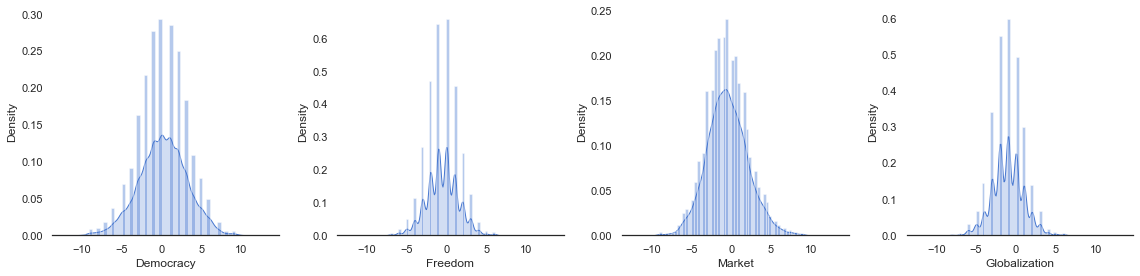

In [37]:
sns.set(style="white", palette="muted", color_codes=True)
f, ax = plt.subplots(1, 4, figsize=(16, 4), sharex=True)
sns.despine(left=True)
# Plot a simple histogram with binsize determined automatically
sns.distplot(df_index["Democracy"], kde=True, color="b",kde_kws={"shade": True}, ax=ax[0])
sns.distplot(df_index["Freedom"], kde=True, color="b",kde_kws={"shade": True},ax=ax[1])
sns.distplot(df_index["Market"], kde=True, color="b", kde_kws={"shade": True}, ax=ax[2])
sns.distplot(df_index["Globalization"], kde=True, color="b", kde_kws={"shade": True}, ax=ax[3])
plt.tight_layout()
plt.savefig('visualizations/index_1.png', dpi=400)

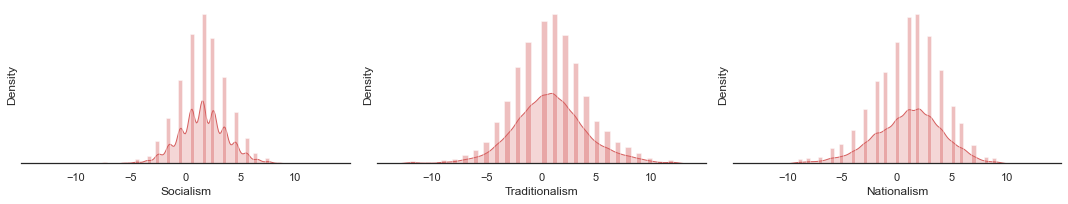

In [38]:
sns.set(style="white", palette="muted", color_codes=True)
f, ax = plt.subplots(1, 3, figsize=(15, 3), sharex=True)
sns.despine(left=True)

# Plot a simple histogram with binsize determined automatically
sns.distplot(df_index["Socialism"], kde=True, color="r", kde_kws={"shade": True}, ax=ax[0])
sns.distplot(df_index["Traditionalism"], kde=True, color="r", kde_kws={"shade": True}, ax=ax[1])
sns.distplot(df_index["Nationalism"], kde=True, color="r", kde_kws={"shade": True}, ax=ax[2])

plt.setp(ax, yticks= [])
plt.tight_layout()
plt.savefig('visualizations/index_2.png', dpi=400)

### Correlation matrix

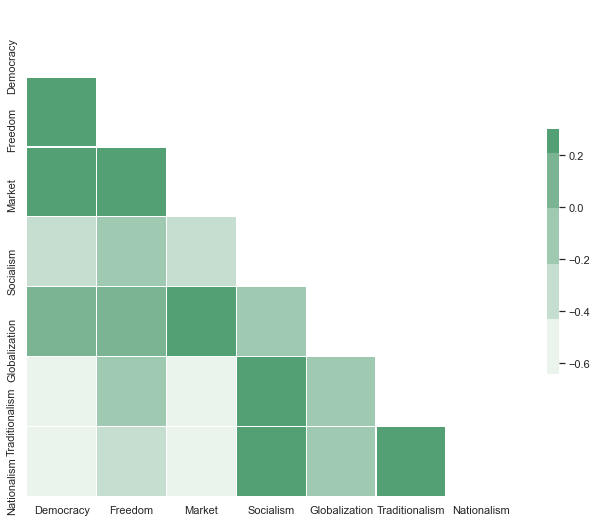

In [39]:
# Generate a mask for the upper triangle
mask= np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f,ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap= sns.light_palette("seagreen")

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

f.savefig("visualizations/corrmatrix.png", dpi=400)

In [40]:
def corr(x, y, **kwargs):
    
    # Calculate the value
    coef = np.corrcoef(x, y)[0][1]
    # Make the label
    label = r'$\rho$ = ' + str(round(coef, 2))
    
    # Add the label to the plot
    ax = plt.gca()
    ax.annotate(label, xy =(0.2, 0.90), size= 15, xycoords = ax.transAxes)

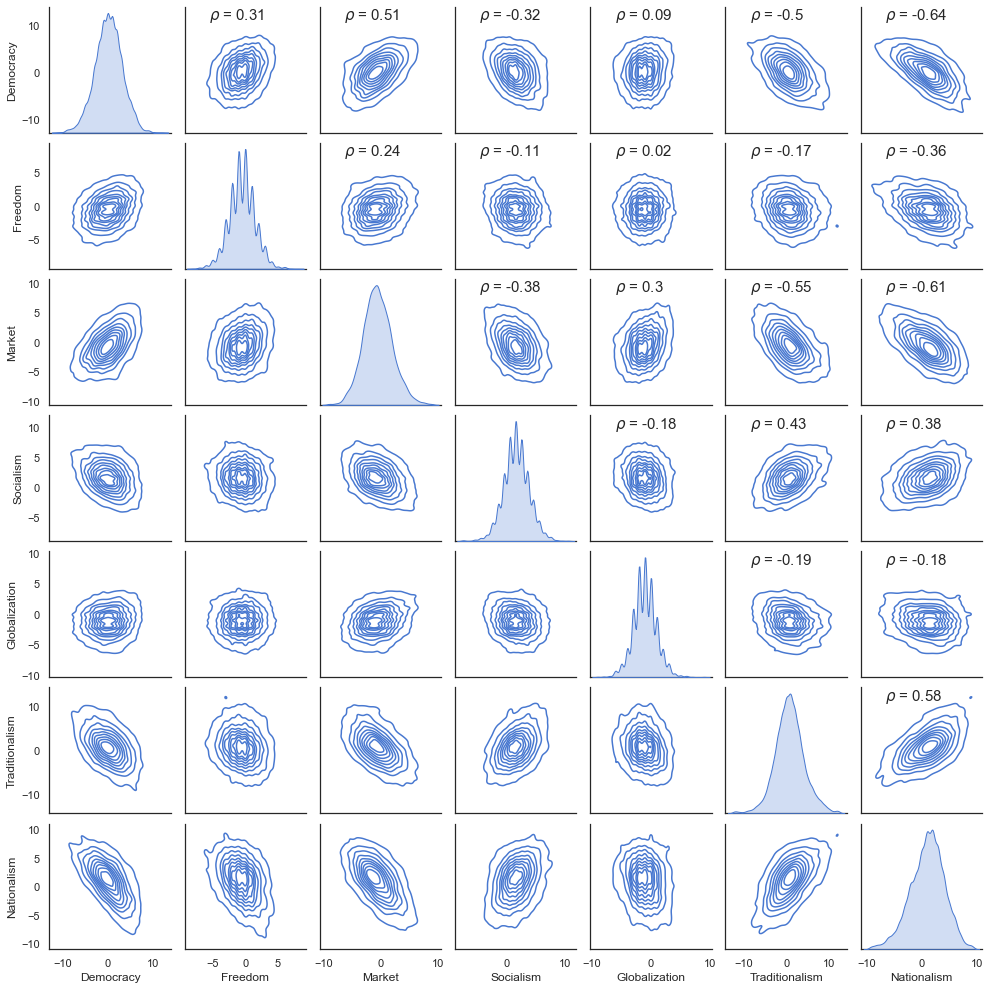

In [41]:
grid= sns.pairplot(df_index,
             kind= 'kde', height=2)
grid= grid.map_upper(corr)
grid.savefig("visualizations/pairplot.png")

In [42]:
from sklearn import preprocessing as pp 
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from imblearn.over_sampling import SMOTE 

from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegression
from scipy.stats import uniform
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.tree import DecisionTreeRegressor as DTreg
from sklearn import tree 
from sklearn.ensemble import RandomForestClassifier as RF

import sklearn.metrics as m

from sklearn.inspection import permutation_importance
from pdpbox import pdp

In [43]:
df_index['q5']= 1* (dat['q5']>2.5)
df_index['q3']= 1* (dat['q3']>2.5)

In [44]:
for i in dat.columns[53:]:
    df_index[i]= dat[i]
    
df_index['age']= dat['age']
df_index['gender']= dat['gender']

In [45]:
df_index

Democracy  Freedom  Market  Socialism  Globalization  Traditionalism  \
0          -3.0     -4.0    -4.0        3.5           -1.0             7.0   
1           4.0     -5.0     0.0        1.5            1.0             4.0   
2           4.0      2.0     0.0        6.5           -4.0             1.0   
3           2.0      1.0     0.5       -1.5           -3.0            -6.0   
4          -2.0     -1.0     0.0        4.5           -6.0             3.0   
...         ...      ...     ...        ...            ...             ...   
9995       -2.0     -1.0     1.0        2.5           -3.0            -1.0   
9996        0.0     -1.0    -2.5        0.5           -1.0            -1.0   
9997       -5.0     -5.0     0.0       -0.5           -1.0            -2.0   
9998       -9.0     -5.0    -4.5        6.5           -2.0             4.0   
9999        2.0     -3.0    -2.0        4.5           -6.0             3.0   

      Nationalism  q5  q3  bhs  ...  i150_300k  ia300k  north  northeast  \
0             6.0   1   0    0  ...          0       0      1          0   
1             3.0   1   0    0  ...          0       0      1          0   
2            -2.0   0   1    0  ...          0       0      0          0   
3            -6.0   1   1    0  ...          1       0      0          0   
4             5.0   0   1    0  ...          0       0      0          0   
...           ...  ..  ..  ...  ...        ...     ...    ...        ...   
9995          2.0   0   1    0  ...          1       0      0          0   
9996          2.0   1   0    0  ...          0       0      0          0   
9997          2.0   1   0    0  ...          0       0      0          0   
9998          9.0   1   0    0  ...          0       1      0          0   
9999          4.0   0   0    0  ...          0       0      1          0   

      east  southcentral  southwest  northwest  age  gender  
0        0             0          0          0   29       1  
1        0             0          0          0   32       1  
2        1             0          0          0   42       0  
3        0             1          0          0   34       0  
4        1             0          0          0   43       0  
...    ...           ...        ...        ...  ...     ...  
9995     0             1          0          0   37       0  
9996     1             0          0          0   39       1  
9997     1             0          0          0   18       0  
9998     1             0          0          0   43       0  
9999     0             0          0          0   20       0  

[10000 rows x 26 columns]

In [46]:
df_index['qs2']= np.where(df_index['q3']+ df_index['q5']==2, 1, 0)
df_index['qs10']= np.where((df_index['q3']> df_index['q5']), 1, 0)
df_index['qs01']= np.where((df_index['q3']< df_index['q5']), 1, 0)
df_index['qs0']= np.where(df_index['q3']+ df_index['q5']==0, 1, 0)

for i in ['qs0','qs10', 'qs01','qs2']:
    print(df_index[i].value_counts())

0    8344
1    1656
Name: qs0, dtype: int64
0    7246
1    2754
Name: qs10, dtype: int64
0    6951
1    3049
Name: qs01, dtype: int64
0    7459
1    2541
Name: qs2, dtype: int64


In [47]:
df_index.to_csv("Data/iptic_index.csv")

## Parametric Models

### `q5`~Index

In [48]:
yi5 = df_index['q5']
Xi5 = df_index.drop(columns=['q5', 'q3', 'qs2','qs10','qs01','qs0'], axis=1)
train_Xi5, test_Xi5, train_yi5, test_yi5= train_test_split(Xi5,yi5,test_size = .25,random_state=123)

In [49]:
## Set up LR
LR = LogisticRegression(solver='saga', tol=1e-2, max_iter=500, 
                              random_state=123)

distributions = dict(C=uniform(0,10), penalty=['l1', 'l2', 'none'])

In [50]:
rad_search_iq5= RandomizedSearchCV(LR, distributions, random_state=123)

rad_search_iq5.fit(train_Xi5,train_yi5)

RandomizedSearchCV(estimator=LogisticRegression(max_iter=500, random_state=123,
                                                solver='saga', tol=0.01),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fd733fe9f70>,
                                        'penalty': ['l1', 'l2', 'none']},
                   random_state=123)

In [51]:
print(rad_search_iq5.best_score_, rad_search_iq5.best_estimator_)

0.6102666666666667 LogisticRegression(C=0.5967789660956835, max_iter=500, penalty='l1',
                   random_state=123, solver='saga', tol=0.01)


In [52]:
glmiq5= rad_search_iq5.best_estimator_
glmiq5_pred_y= glmiq5.predict(test_Xi5)
m.accuracy_score(test_yi5, glmiq5_pred_y)

0.6104

In [53]:
glm_iq5= pd.DataFrame(dict(variable= train_Xi5.columns))
glm_iq5['coef']= rad_search_iq5.best_estimator_.coef_.tolist()[0]
glm_iq5

variable      coef
0        Democracy -0.049490
1          Freedom -0.052308
2           Market -0.057217
3        Socialism  0.009120
4    Globalization  0.038824
5   Traditionalism  0.041135
6      Nationalism  0.033044
7              bhs -0.113342
8               hs -0.199252
9          college  0.118658
10   above_college  0.437632
11          i0_50k -0.017197
12        i50_100k -0.031542
13       i100_150k  0.028064
14       i150_300k  0.226365
15          ia300k  0.018794
16           north  0.082294
17       northeast  0.115575
18            east  0.072209
19    southcentral  0.017129
20       southwest -0.201360
21       northwest  0.088984
22             age -0.003440
23          gender -0.242701

#### Statistical Model

In [54]:
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import logit

In [55]:
a= train_Xi5.copy()
a['q5']= train_yi5

In [56]:
ff_iq5= "q5~Democracy+ Freedom+ Market+ Socialism+ Globalization+ Traditionalism+ Nationalism+ hs+ college+ above_college+ i50_100k+ i100_150k+ i150_300k+ ia300k+ north+ northeast+ east+ southcentral+ southwest+ age+ gender"

In [57]:
glm_mod_iq5 = logit(ff_iq5, data= a).fit_regularized(method= "l1", alpha= 1/(0.5967789660956835))

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.6557886296149207
            Iterations: 126
            Function evaluations: 130
            Gradient evaluations: 126


In [58]:
## Create a 95% CIs
glm_iq5= glm_mod_iq5.conf_int().iloc[1:]
glm_iq5['coef']= glm_mod_iq5.params
glm_iq5.columns= ['low', 'high', 'coef']
glm_iq5= glm_iq5.reset_index().rename(columns={"index": "variable"})
glm_iq5['sd']= abs((glm_iq5['high']- glm_iq5['low'])/2)
glm_iq5

variable       low      high      coef        sd
0        Democracy -0.071910 -0.029408 -0.050659  0.021251
1          Freedom -0.076567 -0.023636 -0.050101  0.026466
2           Market -0.084849 -0.033484 -0.059166  0.025683
3        Socialism -0.015564  0.033684  0.009060  0.024624
4    Globalization  0.015301  0.065874  0.040588  0.025287
5   Traditionalism  0.023079  0.061103  0.042091  0.019012
6      Nationalism  0.008745  0.055871  0.032308  0.023563
7               hs       NaN       NaN  0.000000       NaN
8          college  0.187582  0.451529  0.319556  0.131973
9    above_college  0.485950  0.835017  0.660483  0.174533
10        i50_100k       NaN       NaN  0.000000       NaN
11       i100_150k -0.194768  0.279224  0.042228  0.236996
12       i150_300k  0.114868  0.458821  0.286844  0.171976
13          ia300k -0.179095  0.264924  0.042915  0.222009
14           north       NaN       NaN  0.000000       NaN
15       northeast -0.149359  0.208375  0.029508  0.178867
16            east -0.159976  0.116215 -0.021880  0.138096
17    southcentral -0.217951  0.060878 -0.078536  0.139414
18       southwest -0.531081 -0.145771 -0.338426  0.192655
19             age -0.008856 -0.000056 -0.004456  0.004400
20          gender -0.350913 -0.159031 -0.254972  0.095941

In [59]:
labels= ['Democracy','Freedom','Market','Socialism','Globalization','Traditionalism', 'Nationalism','High School',
 'College','Above college','50-100k','100-150k','150-300k','Above 300k',
 'North','Northeast','East','Southcentral','Southwest','Age','Gender']

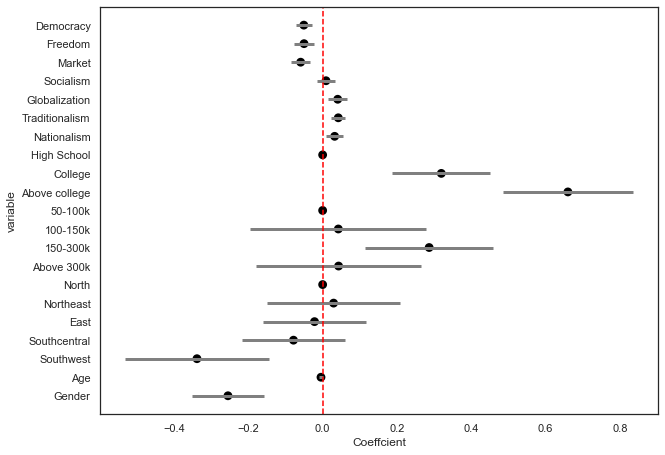

In [60]:
f,ax= plt.subplots(figsize=(10, 7.5))
sns.set_style("whitegrid")

sns.pointplot(x="coef", y= "variable", data= glm_iq5, dodge=True, join=False, ci= None, color= "black")
ax.errorbar(glm_iq5.coef, glm_iq5.variable, xerr= glm_iq5.sd, ls= "None",
            ecolor= "gray", capthick=0.2, elinewidth=3)
## Add x=o
plt.axvline(x=0, color= "red", linestyle='--')

## Rename labels 
ax.set_yticklabels(labels)
ax.set_xlabel("Coeffcient")

f.savefig("visualizations/coefq5.png", dpi=400)

### `q3`~Index

In [61]:
yi3 = df_index['q3']
Xi3 = df_index.drop(columns=['q5', 'q3', 'qs2','qs10','qs01','qs0'], axis=1)
train_Xi3, test_Xi3, train_yi3, test_yi3= train_test_split(Xi3,yi3,test_size = .25,random_state=123)

In [62]:
rad_search_iq3 = RandomizedSearchCV(LR, distributions, random_state=123)

rad_search_iq3.fit(train_Xi3,train_yi3)

RandomizedSearchCV(estimator=LogisticRegression(max_iter=500, random_state=123,
                                                solver='saga', tol=0.01),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fd733fe9f70>,
                                        'penalty': ['l1', 'l2', 'none']},
                   random_state=123)

In [63]:
print(rad_search_iq3.best_score_, rad_search_iq3.best_estimator_)

0.7194666666666667 LogisticRegression(C=0.5967789660956835, max_iter=500, penalty='l1',
                   random_state=123, solver='saga', tol=0.01)


In [64]:
glmiq3= rad_search_iq3.best_estimator_
glmiq3_pred_y= glmiq3.predict(test_Xi3)
m.accuracy_score(test_yi3, glmiq3_pred_y)

0.7208

In [65]:
b= train_Xi3.copy()
b['q3']= train_yi3

In [66]:
ff_iq3= "q3~Democracy+ Freedom+ Market+ Socialism+ Globalization+ Traditionalism+ Nationalism+ hs+ college+ above_college+ i50_100k+ i100_150k+ i150_300k+ ia300k+ north+ northeast+ east+ southcentral+ southwest+ age+ gender"

In [67]:
glm_mod_iq3 = logit(ff_iq3,b).fit_regularized(method= "l1", alpha= 1/(0.5967789660956835))

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.5376051980190013
            Iterations: 132
            Function evaluations: 136
            Gradient evaluations: 132


In [68]:
## Create a 95% CIs
glm_iq3= glm_mod_iq3.conf_int().iloc[1:]
glm_iq3['coefficient']= glm_mod_iq3.params
glm_iq3.columns= ['low', 'high', 'coefficient']
glm_iq3= glm_iq3.reset_index().rename(columns={"index": "variable"})
glm_iq3['sd']= abs((glm_iq3['high']- glm_iq3['low'])/2)
glm_iq3

variable       low      high  coefficient        sd
0        Democracy  0.131483  0.180649     0.156066  0.024583
1          Freedom  0.202560  0.265248     0.233904  0.031344
2           Market  0.118288  0.177577     0.147932  0.029644
3        Socialism  0.008339  0.065614     0.036976  0.028638
4    Globalization -0.060635 -0.002370    -0.031503  0.029132
5   Traditionalism -0.052051 -0.008254    -0.030152  0.021898
6      Nationalism -0.197821 -0.142516    -0.170168  0.027652
7               hs       NaN       NaN     0.000000       NaN
8          college -0.198670  0.108462    -0.045104  0.153566
9    above_college -0.258160  0.148373    -0.054893  0.203266
10        i50_100k -0.100348  0.148679     0.024166  0.124513
11       i100_150k -0.361162  0.192100    -0.084531  0.276631
12       i150_300k -0.115608  0.300982     0.092687  0.208295
13          ia300k -0.295459  0.253397    -0.021031  0.274428
14           north -0.193283  0.361741     0.084229  0.277512
15       northeast -0.253937  0.316785     0.031424  0.285361
16            east -0.089034  0.422513     0.166740  0.255773
17    southcentral -0.209169  0.304921     0.047876  0.257045
18       southwest  0.046859  0.642860     0.344860  0.298000
19             age -0.001980  0.008157     0.003089  0.005069
20          gender  0.050766  0.268233     0.159499  0.108734

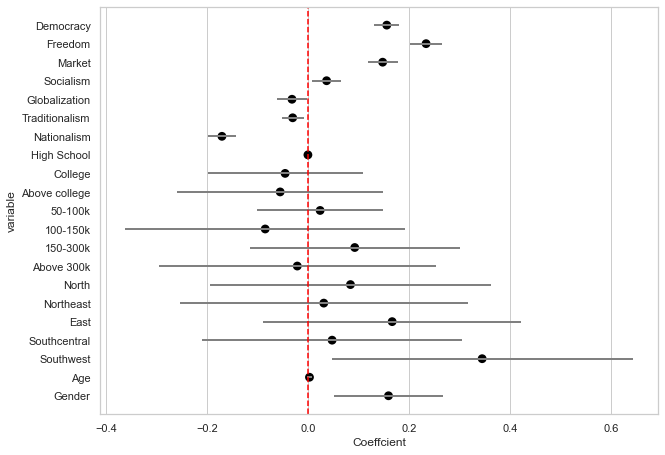

In [69]:
f,ax = plt.subplots(figsize=(10, 7.5))
sns.set_style("whitegrid")
sns.pointplot(x="coefficient", y= "variable", data= glm_iq3, dodge=True, join= False, color= "black")
ax.errorbar(glm_iq3.coefficient, glm_iq3.variable, xerr= glm_iq3.sd, ls= "None",
            ecolor= "gray", capthick=0.2, elinewidth=2)
## Add x=o
plt.axvline(x=0, color= "red", linestyle='--')

## Rename labels 
ax.set_yticklabels(labels)
ax.set_xlabel("Coeffcient")

f.savefig("visualizations/coefq3.png", dpi=400)

### `qs0`~Index

In [70]:
## Split the data
yiqs0 = df_index['qs0']
Xiqs0 = df_index.drop(columns=['q5','q3','qs2','qs10','qs01','qs0'], axis=1)
train_Xiqs0, test_Xiqs0, train_yiqs0, test_yiqs0= train_test_split(Xiqs0,yiqs0,test_size = .25,random_state=123)

rad_search_iqs0 = RandomizedSearchCV(LR, distributions, random_state=123)
rad_search_iqs0.fit(train_Xiqs0,train_yiqs0)
print(rad_search_iqs0.best_score_, rad_search_iqs0.best_estimator_)

glmiqs0= rad_search_iqs0.best_estimator_
glmiqs0_pred_y= glmiqs0.predict(test_Xiqs0)
m.accuracy_score(test_yiqs0, glmiqs0_pred_y)

0.8333333333333334 LogisticRegression(C=6.964691855978616, max_iter=500, penalty='none',
                   random_state=123, solver='saga', tol=0.01)


0.8372

In [72]:
ff_iqs0= "qs0~Democracy+ Freedom+ Market+ Socialism+ Globalization+ Traditionalism+ Nationalism+ hs+ college+ above_college+ i50_100k+ i100_150k+ i150_300k+ ia300k+ north+ northeast+ east+ southcentral+ southwest+ age+ gender"

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.4295436821048346
            Iterations: 107
            Function evaluations: 112
            Gradient evaluations: 107


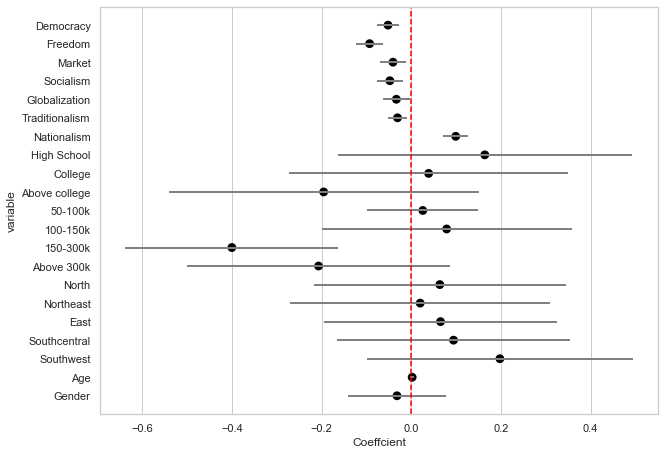

In [73]:
## Copy the train dataset
c= Xiqs0.copy()
c['qs0']= yiqs0

## Fit the model and create a df contains coefficients and sd
glm_mod_iqs0= logit(ff_iqs0, c).fit_regularized(C=6.964691855978616)
glm_iqs0= glm_mod_iqs0.conf_int().iloc[1:]
glm_iqs0['coefficient']= glm_mod_iqs0.params
glm_iqs0.columns= ['low', 'high', 'coefficient']
glm_iqs0= glm_iqs0.reset_index().rename(columns={"index": "variable"})
glm_iqs0['sd']= abs((glm_iqs0['high']- glm_iqs0['low'])/2)
glm_iqs0

## Creata the barplot
f,ax = plt.subplots(figsize=(10, 7.5))
sns.set_style("whitegrid")
sns.pointplot(x="coefficient", y= "variable", data= glm_iqs0, dodge=True, join= False, color= "black")
ax.errorbar(glm_iqs0.coefficient, glm_iqs0.variable, xerr= glm_iqs0.sd, ls= "None",
            ecolor= "gray", capthick=0.2, elinewidth=2)
## Add x=0
plt.axvline(x=0, color= "red", linestyle='--')

## Rename labels 
ax.set_yticklabels(labels)
ax.set_xlabel("Coeffcient")

f.savefig("visualizations/coefiqs0.png", dpi=400)

### `qs10`

In [74]:
## Split the data
yiqs10 = df_index['qs10']
Xiqs10 = df_index.drop(columns=['q5','q3','qs2','qs10','qs01', 'qs0'], axis=1)
train_Xiqs10, test_Xiqs10, train_yiqs10, test_yiqs10= train_test_split(Xiqs10,yiqs10,test_size = .25,random_state=123)

rad_search_iqs10 = RandomizedSearchCV(LR, distributions, random_state=123)
rad_search_iqs10.fit(train_Xiqs10,train_yiqs10)
print(rad_search_iqs10.best_score_, rad_search_iqs10.best_estimator_)

glmiqs10= rad_search_iqs10.best_estimator_
glmiqs10_pred_y= glmiqs10.predict(test_Xiqs10)
m.accuracy_score(test_yiqs10, glmiqs10_pred_y)

0.7502666666666667 LogisticRegression(C=4.010175566612036, max_iter=500, penalty='l1',
                   random_state=123, solver='saga', tol=0.01)


0.7572

In [75]:
ff_iqs10= "qs10~Democracy+ Freedom+ Market+ Socialism+ Globalization+ Traditionalism+ Nationalism+ hs+ college+ above_college+ i50_100k+ i100_150k+ i150_300k+ ia300k+ north+ northeast+ east+ southcentral+ southwest+ age+ gender"

In [76]:
## Copy the train dataset
d= train_Xiqs10.copy()
d['qs10']= train_yiqs10

## Fit the model and create a df contains coefficients and sd
glm_mod_iqs10= logit(ff_iqs10, d).fit_regularized(C=4.010175566612036)
glm_iqs10= glm_mod_iqs10.conf_int().iloc[1:]
glm_iqs10['coefficient']= glm_mod_iqs10.params
glm_iqs10.columns= ['low', 'high', 'coefficient']
glm_iqs10= glm_iqs10.reset_index().rename(columns={"index": "variable"})
glm_iqs10['sd']= abs((glm_iqs10['high']- glm_iqs10['low'])/2)
glm_iqs10

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.5096414684547231
            Iterations: 101
            Function evaluations: 106
            Gradient evaluations: 101


variable       low      high  coefficient        sd
0        Democracy  0.091441  0.142539     0.116990  0.025549
1          Freedom  0.103882  0.166576     0.135229  0.031347
2           Market  0.071902  0.132614     0.102258  0.030356
3        Socialism -0.008028  0.049469     0.020721  0.028748
4    Globalization -0.077177 -0.017755    -0.047466  0.029711
5   Traditionalism -0.062964 -0.017646    -0.040305  0.022659
6      Nationalism -0.128028 -0.073096    -0.100562  0.027466
7               hs -0.460919  0.206970    -0.126975  0.333945
8          college -0.777653 -0.153747    -0.465700  0.311953
9    above_college -1.104231 -0.420651    -0.762441  0.341790
10        i50_100k -0.116815  0.144500     0.013843  0.130657
11       i100_150k -0.427174  0.153193    -0.136990  0.290184
12       i150_300k -0.339129  0.082811    -0.128159  0.210970
13          ia300k -0.251483  0.276021     0.012269  0.263752
14           north -0.133101  0.476962     0.171931  0.305031
15       northeast -0.191560  0.437735     0.123087  0.314648
16            east -0.057176  0.507865     0.225345  0.282521
17    southcentral -0.068131  0.498998     0.215434  0.283564
18       southwest  0.200014  0.838758     0.519386  0.319372
19             age  0.000043  0.010541     0.005292  0.005249
20          gender  0.171307  0.396417     0.283862  0.112555

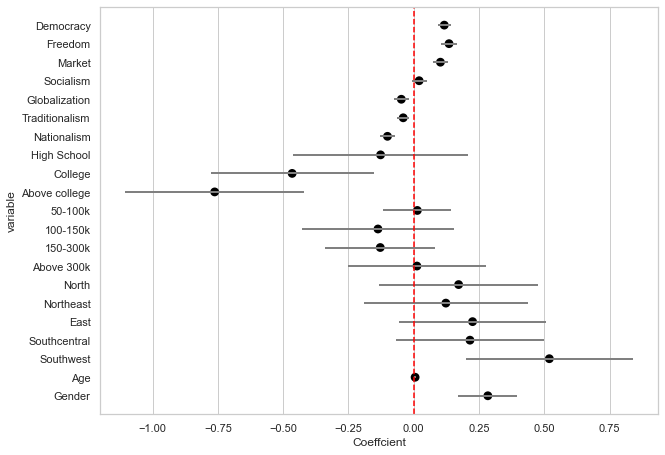

In [77]:
f,ax = plt.subplots(figsize=(10, 7.5))
sns.set_style("whitegrid")
sns.pointplot(x="coefficient", y= "variable", data= glm_iqs10, dodge=True, join= False, color= "black")
ax.errorbar(glm_iqs10.coefficient, glm_iqs10.variable, xerr= glm_iqs10.sd, ls= "None",
            ecolor= "gray", capthick=0.2, elinewidth=2)
## Add x=0
plt.axvline(x=0, color= "red", linestyle='--')

## Rename labels 
ax.set_yticklabels(labels)
ax.set_xlabel("Coeffcient")

f.savefig("visualizations/coefiqs10.png", dpi=400)

### `qs01`

In [78]:
## Split the data
yiqs01 = df_index['qs01']
Xiqs01 = df_index.drop(columns=['q5','q3','qs2','qs01','qs01', 'qs0'], axis=1)
train_Xiqs01, test_Xiqs01, train_yiqs01, test_yiqs01= train_test_split(Xiqs01,yiqs01,test_size = .25,random_state=123)

rad_search_iqs01 = RandomizedSearchCV(LR, distributions, random_state=123)
rad_search_iqs01.fit(train_Xiqs01,train_yiqs01)
print(rad_search_iqs01.best_score_, rad_search_iqs01.best_estimator_)

glmiqs01= rad_search_iqs01.best_estimator_
glmiqs01_pred_y= glmiqs01.predict(test_Xiqs01)
m.accuracy_score(test_yiqs01, glmiqs01_pred_y)

0.7462666666666667 LogisticRegression(C=6.964691855978616, max_iter=500, penalty='none',
                   random_state=123, solver='saga', tol=0.01)


0.7344

In [79]:
ff_iqs01= "qs01~Democracy+ Freedom+ Market+ Socialism+ Globalization+ Traditionalism+ Nationalism+ hs+ college+ above_college+ i50_100k+ i100_150k+ i150_300k+ ia300k+ north+ northeast+ east+ southcentral+ southwest+ age+ gender"

In [80]:
## Copy the train dataset
e= train_Xiqs01.copy()
e['qs01']= train_yiqs01

## Fit the model and create a df contains coefficients and sd
glm_mod_iqs01= logit(ff_iqs01, e).fit_regularized(C=4.010175566612036)
glm_iqs01= glm_mod_iqs01.conf_int().iloc[1:]
glm_iqs01['coefficient']= glm_mod_iqs01.params
glm_iqs01.columns= ['low', 'high', 'coefficient']
glm_iqs01= glm_iqs01.reset_index().rename(columns={"index": "variable"})
glm_iqs01['sd']= abs((glm_iqs01['high']- glm_iqs01['low'])/2)
glm_iqs01

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.5129145799876123
            Iterations: 104
            Function evaluations: 109
            Gradient evaluations: 104


variable       low      high  coefficient        sd
0        Democracy -0.144159 -0.094787    -0.119473  0.024686
1          Freedom -0.208286 -0.145069    -0.176678  0.031609
2           Market -0.164440 -0.103862    -0.134151  0.030289
3        Socialism -0.036515  0.022158    -0.007179  0.029336
4    Globalization  0.013522  0.073337     0.043430  0.029908
5   Traditionalism  0.026209  0.070396     0.048302  0.022094
6      Nationalism  0.095347  0.152290     0.123818  0.028471
7               hs -0.328402  0.350004     0.010801  0.339203
8          college -0.158798  0.478856     0.160029  0.318827
9    above_college -0.010527  0.685495     0.337484  0.348011
10        i50_100k -0.182062  0.074158    -0.053952  0.128110
11       i100_150k -0.227529  0.352442     0.062457  0.289985
12       i150_300k -0.075857  0.354548     0.139345  0.215203
13          ia300k -0.126028  0.441458     0.157715  0.283743
14           north -0.423719  0.125904    -0.148908  0.274811
15       northeast -0.370874  0.193845    -0.088515  0.282360
16            east -0.456697  0.049375    -0.203661  0.253036
17    southcentral -0.419558  0.088092    -0.165733  0.253825
18       southwest -0.847175 -0.238170    -0.542673  0.304502
19             age -0.008802  0.001725    -0.003539  0.005263
20          gender -0.356685 -0.130860    -0.243773  0.112912

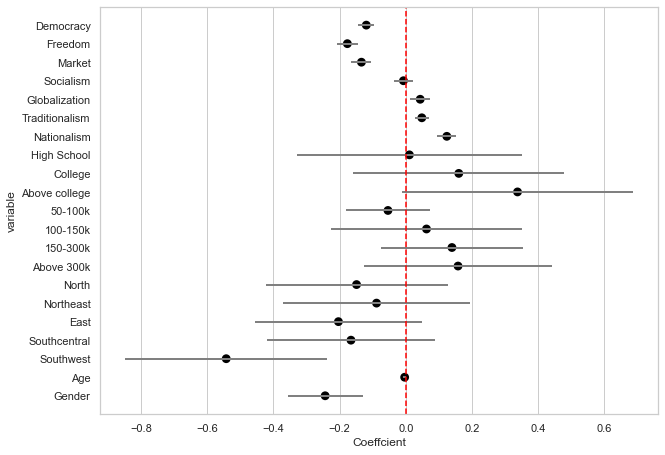

In [81]:
f,ax = plt.subplots(figsize=(10, 7.5))
sns.set_style("whitegrid")
sns.pointplot(x="coefficient", y= "variable", data= glm_iqs01, dodge=True, join= False, color= "black")
ax.errorbar(glm_iqs01.coefficient, glm_iqs01.variable, xerr= glm_iqs01.sd, ls= "None",
            ecolor= "gray", capthick=0.2, elinewidth=2)
## Add x=0
plt.axvline(x=0, color= "red", linestyle='--')

## Rename labels 
ax.set_yticklabels(labels)
ax.set_xlabel("Coeffcient")

f.savefig("visualizations/coefiqs01.png", dpi=400)

### `qs2`

In [82]:
yiqs2 = df_index['qs2']
Xiqs2 = df_index.drop(columns=['q5','q3','qs2','qs10','qs01','qs0'], axis=1)
train_Xiqs2, test_Xiqs2, train_yiqs2, test_yiqs2= train_test_split(Xiqs2,yiqs2,test_size = .25,random_state=123)

rad_search_iqs2 = RandomizedSearchCV(LR, distributions, random_state=123)
rad_search_iqs2.fit(train_Xiqs2,train_yiqs2)
print(rad_search_iqs2.best_score_, rad_search_iqs2.best_estimator_)

glmiqs2= rad_search_iqs2.best_estimator_
glmiqs2_pred_y= glmiqs2.predict(test_Xiqs2)
m.accuracy_score(test_yiqs2, glmiqs2_pred_y)

0.7401333333333333 LogisticRegression(C=6.964691855978616, max_iter=500, penalty='none',
                   random_state=123, solver='saga', tol=0.01)


0.7408

In [84]:
ff_iqs2= "qs2~Democracy+ Freedom+ Market+ Socialism+ Globalization+ Traditionalism+ Nationalism+ hs+ college+ above_college+ i50_100k+ i100_150k+ i150_300k+ ia300k+ north+ northeast+ east+ southcentral+ southwest+ age+ gender"

In [85]:
f= train_Xiqs2.copy()
f["qs2"]= train_yiqs2

glm_mod_iqs2= logit(ff_iqs2, f).fit_regularized(C=6.964691855978616)

## Create a 95% CIs
glm_iqs2= glm_mod_iqs2.conf_int().iloc[1:]
glm_iqs2['coefficient']= glm_mod_iqs2.params
glm_iqs2.columns= ['low', 'high', 'coefficient']
glm_iqs2= glm_iqs2.reset_index().rename(columns={"index": "variable"})
glm_iqs2['sd']= abs((glm_iqs2['high']- glm_iqs2['low'])/2)
glm_iqs2

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.5429996959305247
            Iterations: 100
            Function evaluations: 105
            Gradient evaluations: 100


variable       low      high  coefficient        sd
0        Democracy  0.032404  0.081119     0.056761  0.024358
1          Freedom  0.064864  0.125133     0.094999  0.030134
2           Market  0.006239  0.064387     0.035313  0.029074
3        Socialism -0.004525  0.050711     0.023093  0.027618
4    Globalization -0.031532  0.025388    -0.003072  0.028460
5   Traditionalism -0.014713  0.028336     0.006812  0.021524
6      Nationalism -0.079270 -0.026342    -0.052806  0.026464
7               hs -0.290061  0.463794     0.086867  0.376927
8          college  0.063497  0.764043     0.413770  0.350273
9    above_college  0.276972  1.018288     0.647630  0.370658
10        i50_100k -0.088009  0.164491     0.038241  0.126250
11       i100_150k -0.242330  0.297628     0.027649  0.269979
12       i150_300k  0.038939  0.430360     0.234649  0.195711
13          ia300k -0.366959  0.156762    -0.105099  0.261860
14           north -0.201610  0.364334     0.081362  0.282972
15       northeast -0.214359  0.369100     0.077371  0.291730
16            east -0.140064  0.382836     0.121386  0.261450
17    southcentral -0.279423  0.247133    -0.016145  0.263278
18       southwest -0.319542  0.292300    -0.013621  0.305921
19             age -0.008817  0.001442    -0.003688  0.005130
20          gender -0.308585 -0.090664    -0.199625  0.108960

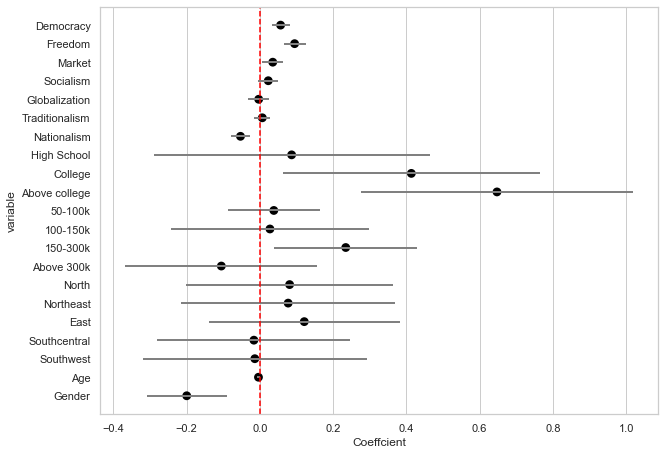

In [86]:
f,ax = plt.subplots(figsize=(10, 7.5))
sns.set_style("whitegrid")
sns.pointplot(x="coefficient", y= "variable", data= glm_iqs2, dodge=True, join= False, color= "black")
ax.errorbar(glm_iqs2.coefficient, glm_iqs2.variable, xerr= glm_iqs2.sd, ls= "None",
            ecolor= "gray", capthick=0.2, elinewidth=2)
## Add x=0
plt.axvline(x=0, color= "red", linestyle='--')

## Rename labels 
ax.set_yticklabels(labels)
ax.set_xlabel("Coeffcient")

f.savefig("visualizations/coefiqs2.png", dpi=400)

### `q5`~ binary-scale questions

In [87]:
y5 = dat_bi[['q5']]
X5 = dat_bi.drop(columns=['q5', 'q3','birthyear', 'i0', 'i01', 'i10', 'i2'], axis=1)
train_X5, test_X5, train_y5, test_y5= train_test_split(X5,y5,test_size = .25,random_state=123)

In [88]:
rad_search_q5= RandomizedSearchCV(LR, distributions, random_state=123)

rad_search_q5.fit(train_X5,train_y5)

RandomizedSearchCV(estimator=LogisticRegression(max_iter=500, random_state=123,
                                                solver='saga', tol=0.01),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fd733fe9f70>,
                                        'penalty': ['l1', 'l2', 'none']},
                   random_state=123)

In [89]:
print(rad_search_q5.best_score_, rad_search_q5.best_estimator_)

0.6333333333333334 LogisticRegression(C=0.5967789660956835, max_iter=500, penalty='l1',
                   random_state=123, solver='saga', tol=0.01)


In [90]:
lasso_q5= rad_search_q5.best_estimator_

In [91]:
lasso_q5_pred_y= lasso_q5.predict(test_X5)

In [92]:
print("Accuracy score:", m.accuracy_score(test_y5, lasso_q5_pred_y))

Accuracy score: 0.6544


In [93]:
ridgeq5mod= pd.DataFrame(dict(variable= train_X5.columns))
ridgeq5mod['coef']= rad_search_q5.best_estimator_.coef_.tolist()[0]

## Arrange the features in a descending way
ridgeq5mod = ridgeq5mod.sort_values(by= "coef",ascending=False).reset_index(drop=True)

In [94]:
ridgeq5mod

variable      coef
0   above_college  0.368788
1             q16  0.274871
2             q25  0.238682
3              q4  0.212256
4       i150_300k  0.185971
..            ...       ...
60      southwest -0.212074
61             q2 -0.256626
62            q39 -0.272421
63            q44 -0.285243
64         gender -0.285932

[65 rows x 2 columns]

### `q3`~ binary-scale questions

In [95]:
## Train-test split
y3 = dat_bi[['q3']]
X3 = dat_bi.drop(columns=['q5', 'q3','birthyear', 'i0', 'i01', 'i10', 'i2'], axis=1)
train_X3, test_X3, train_y3, test_y3= train_test_split(X3,y3,test_size = .25,random_state=123)

rad_search_q3= RandomizedSearchCV(LR, distributions, random_state=123)
rad_search_q3.fit(train_X3,train_y3)

RandomizedSearchCV(estimator=LogisticRegression(max_iter=500, random_state=123,
                                                solver='saga', tol=0.01),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fd733fe9f70>,
                                        'penalty': ['l1', 'l2', 'none']},
                   random_state=123)

In [96]:
print(rad_search_q3.best_score_, rad_search_q3.best_estimator_)

0.77 LogisticRegression(C=0.5967789660956835, max_iter=500, penalty='l1',
                   random_state=123, solver='saga', tol=0.01)


In [97]:
mod_q3= rad_search_q3.best_estimator_
mod_q3_pred_y= rad_search_q3.predict(test_X3)
print("Accuracy score:", m.accuracy_score(test_y3, mod_q3_pred_y))

Accuracy score: 0.7716


### `i0`

In [98]:
## Train-test split
yi0 = dat_bi[['i0']]
Xi0 = dat_bi.drop(columns=['q5', 'q3','birthyear', 'i0', 'i01', 'i10', 'i2'], axis=1)
train_Xi0, test_Xi0, train_yi0, test_yi0= train_test_split(Xi0,yi0,test_size = .25, random_state=123)

rad_search_i0= RandomizedSearchCV(LR, distributions, random_state=123)
rad_search_i0.fit(train_Xi0,train_yi0)

print(rad_search_i0.best_score_, rad_search_i0.best_estimator_)

mod_i0= rad_search_i0.best_estimator_
mod_i0_pred_y= rad_search_i0.predict(test_Xi0)
print("Accuracy score:", m.accuracy_score(test_yi0, mod_i0_pred_y))

0.8331999999999999 LogisticRegression(C=0.5967789660956835, max_iter=500, penalty='l1',
                   random_state=123, solver='saga', tol=0.01)
Accuracy score: 0.8384


### `i01`

In [99]:
## Train-test split
yi01 = dat_bi[['i01']]
Xi01 = dat_bi.drop(columns=['q5', 'q3','birthyear', 'i0', 'i01', 'i10', 'i2'], axis=1)
train_Xi01, test_Xi01, train_yi01, test_yi01= train_test_split(Xi01,yi01,test_size = .25, random_state=123)

## Randomized Search 
rad_search_i01= RandomizedSearchCV(LR, distributions, random_state=123)
rad_search_i01.fit(train_Xi01,train_yi01)

## Print accuracy score
print(rad_search_i01.best_score_, rad_search_i01.best_estimator_)

mod_i01= rad_search_i01.best_estimator_
mod_i01_pred_y= rad_search_i01.predict(test_Xi01)
print("Accuracy score:", m.accuracy_score(test_yi01, mod_i01_pred_y))

0.7622666666666666 LogisticRegression(C=0.5967789660956835, max_iter=500, penalty='l1',
                   random_state=123, solver='saga', tol=0.01)
Accuracy score: 0.7576


### `i10`

In [100]:
## Train-test split
yi10 = dat_bi[['i10']]
Xi10 = dat_bi.drop(columns=['q5', 'q3','birthyear', 'i0', 'i01', 'i10', 'i2'], axis=1)
train_Xi10, test_Xi10, train_yi10, test_yi10= train_test_split(Xi10,yi10,test_size = .25, random_state=123)

## Random Search 
rad_search_i10= RandomizedSearchCV(LR, distributions, random_state=123)
rad_search_i10.fit(train_Xi10,train_yi10)

## Print accuracy score
print(rad_search_i10.best_score_, rad_search_i10.best_estimator_)

mod_i10= rad_search_i10.best_estimator_
mod_i10_pred_y= rad_search_i10.predict(test_Xi10)
print("Accuracy score:", m.accuracy_score(test_yi10, mod_i10_pred_y))

0.7673333333333333 LogisticRegression(C=6.964691855978616, max_iter=500, penalty='none',
                   random_state=123, solver='saga', tol=0.01)
Accuracy score: 0.7776


### `i2`

In [101]:
## Train-test split
yi2 = dat_bi[['i2']]
Xi2 = dat_bi.drop(columns=['q5', 'q3','birthyear', 'i0', 'i01', 'i10', 'i2'], axis=1)
train_Xi2, test_Xi2, train_yi2, test_yi2= train_test_split(Xi2,yi2,test_size = .25, random_state=123)

## Random Search 
rad_search_i2= RandomizedSearchCV(LR, distributions, random_state=123)
rad_search_i2.fit(train_Xi2,train_yi2)

## Print accuracy score
print(rad_search_i2.best_score_, rad_search_i2.best_estimator_)

mod_i2= rad_search_i2.best_estimator_
mod_i2_pred_y= rad_search_i2.predict(test_Xi2)
print("Accuracy score:", m.accuracy_score(test_yi2, mod_i2_pred_y))

0.7445333333333333 LogisticRegression(C=0.5967789660956835, max_iter=500, penalty='l1',
                   random_state=123, solver='saga', tol=0.01)
Accuracy score: 0.7424


## Non-parametric Models

In [102]:
## Set the folds index to ensure comparable samples
fold_generator= KFold(n_splits=10, shuffle=True,random_state=1234)

In [103]:
pipe = Pipeline(steps=[('pre_process', pp.MinMaxScaler()),('model',None)])

In [104]:
search_space = [
    
    # KNN with K tuning param
    {'model' : [KNN()],
     'model__n_neighbors':[5,10,15,20,30,40,50]},
    
    # Decision Tree with the Max Depth Param
    {'model': [DT()],
     'model__max_depth':[2,3,4,5,6,7,8,9,10]},
    
    # Random forest with the N Estimators tuning param
    {'model' : [RF()],
    'model__max_depth':[2,3,4,5,6,7,8,9,10],
    'model__n_estimators':[10,250,500,750,1000]}
]

### `q3`~binary-scale questions

In [105]:
search_bq3 = GridSearchCV(pipe, search_space, 
                      cv = fold_generator,
                      scoring='roc_auc',
                      n_jobs=4)

In [106]:
search_bq3.fit(train_X3,train_y3)

GridSearchCV(cv=KFold(n_splits=10, random_state=1234, shuffle=True),
             estimator=Pipeline(steps=[('pre_process', MinMaxScaler()),
                                       ('model', None)]),
             n_jobs=4,
             param_grid=[{'model': [KNeighborsClassifier()],
                          'model__n_neighbors': [5, 10, 15, 20, 30, 40, 50]},
                         {'model': [DecisionTreeClassifier()],
                          'model__max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
                         {'model': [RandomForestClassifier(max_depth=10,
                                                           n_estimators=1000)],
                          'model__max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'model__n_estimators': [10, 250, 500, 750, 1000]}],
             scoring='roc_auc')

In [107]:
print(search_bq3.best_score_, search_bq3.best_params_)

0.8841883429417742 {'model': RandomForestClassifier(max_depth=10, n_estimators=1000), 'model__max_depth': 10, 'model__n_estimators': 1000}


In [108]:
rf_mod_bq3= search_bq3.best_estimator_

## Train and test metrics
print("Accuracy score (Training):", m.accuracy_score(train_y3,rf_mod_bq3.predict(train_X3)),'\n'
      "ROC AUC score (Training):", m.roc_auc_score(train_y3,rf_mod_bq3.predict_proba(train_X3)[:,1]),'\n'
      "F1 score (Training):", m.f1_score(train_y3, rf_mod_bq3.predict(train_X3)), '\n'
      "Accuracy score (Test):", m.accuracy_score(test_y3, rf_mod_bq3.predict(test_X3)), '\n'
      "ROC AUC score (Test):", m.roc_auc_score(test_y3,rf_mod_bq3.predict_proba(test_X3)[:,1]), '\n'
      "F1 score (Test):", m.f1_score(test_y3, rf_mod_bq3.predict(test_X3)))

Accuracy score (Training): 0.9289333333333334 
ROC AUC score (Training): 0.9774121919604215 
F1 score (Training): 0.9326935219093321 
Accuracy score (Test): 0.7964 
ROC AUC score (Test): 0.8820412066818941 
F1 score (Test): 0.8055024837600304


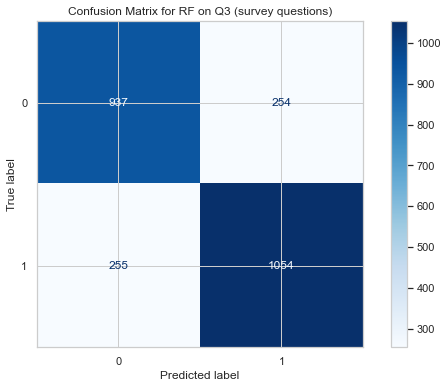

In [109]:
## Plot the confusion Matrix
fig, ax= plt.subplots(figsize= (10, 6))
m.plot_confusion_matrix(rf_mod_bq3, test_X3, test_y3,
                        cmap= plt.cm.Blues, ax=ax)
ax.set_title('Confusion Matrix for RF on Q3 (survey questions)')
fig.savefig("visualizations/cm/cmrfbq3.png", dpi=400)

In [113]:
def gen_PI_plot(model, TrainX, Trainy, name= None):
     
    ## With 25 repeat to get a more accurate estimation
    vi= permutation_importance(model, TrainX, Trainy, n_repeats=5)

    ## Organize as a data frame 
    vi_dat= pd.DataFrame(dict(variable=TrainX.columns,
                           vi= vi['importances_mean'],
                           std= vi['importances_std']))

    vi_dat = vi_dat.sort_values(by= "vi",ascending=False).reset_index(drop=True)
    vi_dat

    f,ax = plt.subplots(figsize=(15, 12))
    sns.set_style("whitegrid")
    sns.barplot(x="vi", y= "variable", data= vi_dat, color= "lightgray")
    ax.errorbar(x= 'vi', y= "variable", xerr= 'std', data= vi_dat, ls= "None",
            ecolor= "black", capthick=0.2, elinewidth=2)
    ax.set_xlabel("Reduction in AUC ROC")
    ax.set_ylabel("Variable")
    f.savefig("visualizations/pi/fi_"+ str(name)+ "_.png", dpi=400)

In [114]:
gen_PI_plot(rf_mod_bq3, train_X3, train_y3, "bq3")

KeyboardInterrupt: 

In [115]:
## Write a function to generate ICE Plot
def gen_ice_plot(estimator= None, features_list= None, data= None, name= None):
    for i in features_list:
        pdp_dist = pdp.pdp_isolate(model= estimator, 
                                   dataset= data,
                                   model_features= data.columns.tolist(),feature=i)
        fig,ax = pdp.pdp_plot(pdp_dist,i, center=False, plot_lines=True, figsize=(10,8))
    
        fig.savefig("visualizations/ICE/"+ str(name)+ "_" +str(i)+".png", dpi=400)   

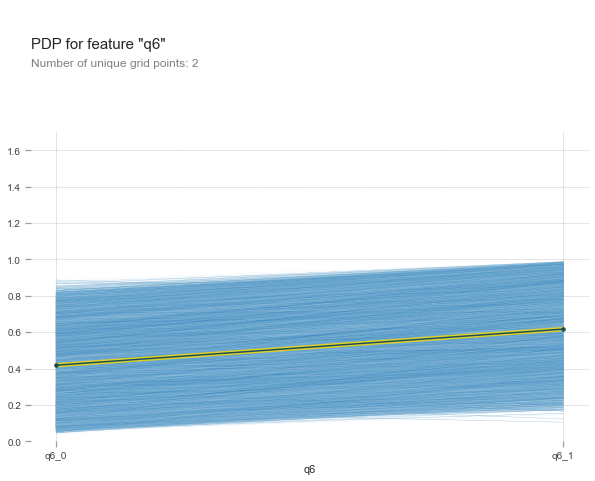

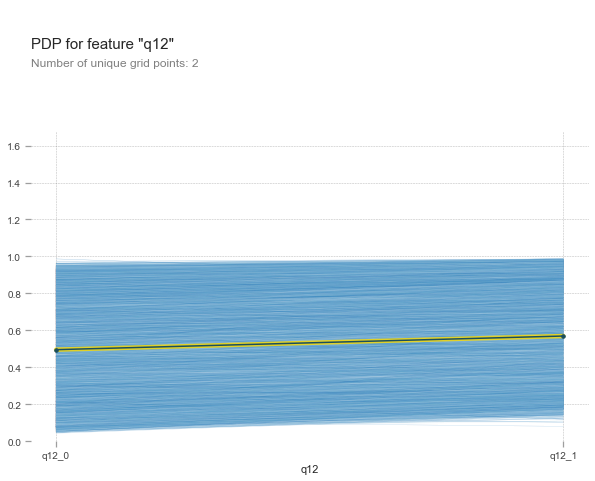

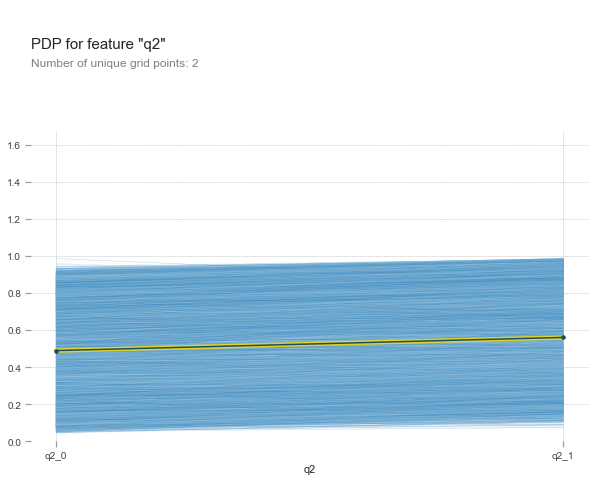

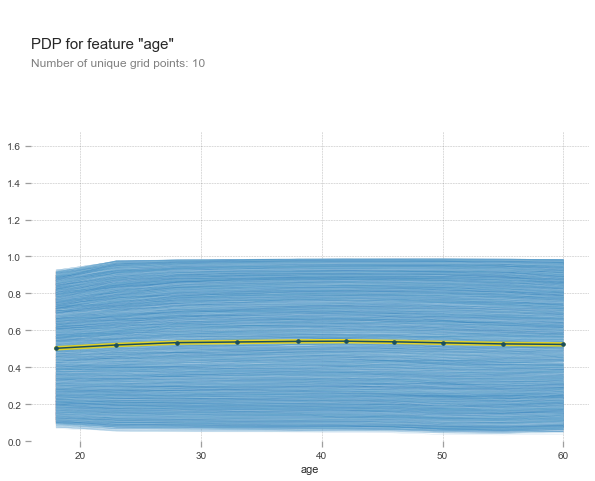

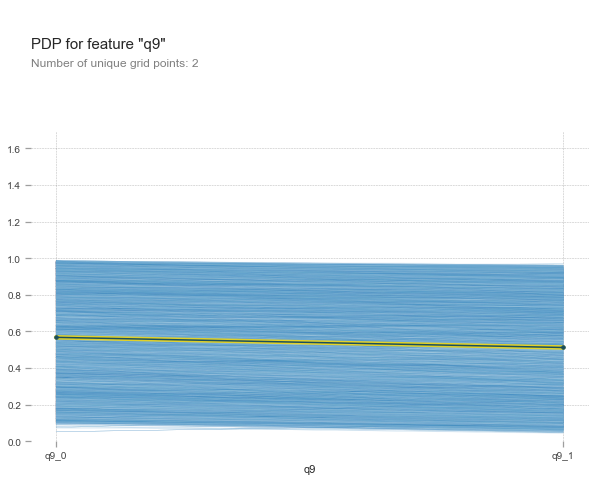

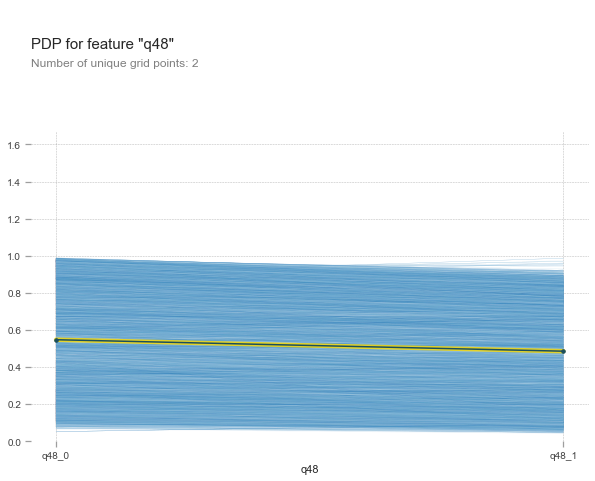

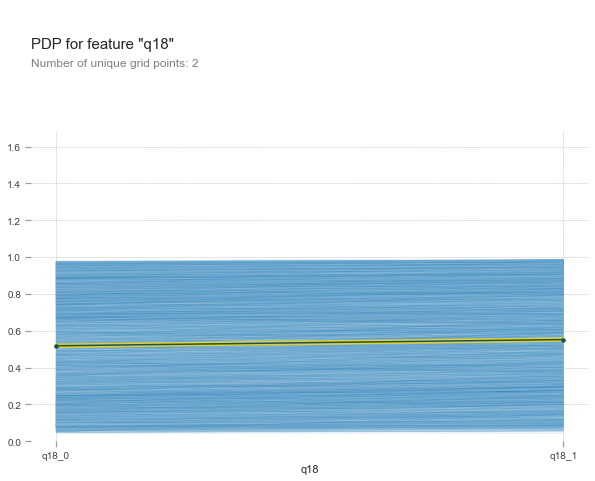

In [116]:
bq3_list= ["q6", 'q12', 'q2', 'age', 'q9', 'q48', 'q18']
gen_ice_plot(rf_mod_bq3, bq3_list, train_X3, name= "bq3")

### `q3`~Index

In [118]:
search_iq3 = GridSearchCV(pipe, search_space, 
                          cv= fold_generator,
                          scoring= 'roc_auc',
                          n_jobs= 4)

search_iq3.fit(train_Xi3,train_yi3)

GridSearchCV(cv=KFold(n_splits=10, random_state=1234, shuffle=True),
             estimator=Pipeline(steps=[('pre_process', MinMaxScaler()),
                                       ('model', None)]),
             n_jobs=4,
             param_grid=[{'model': [KNeighborsClassifier()],
                          'model__n_neighbors': [5, 10, 15, 20, 30, 40, 50]},
                         {'model': [DecisionTreeClassifier()],
                          'model__max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
                         {'model': [RandomForestClassifier(max_depth=10,
                                                           n_estimators=750)],
                          'model__max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'model__n_estimators': [10, 250, 500, 750, 1000]}],
             scoring='roc_auc')

In [119]:
print(search_iq3.best_score_, search_iq3.best_params_)

0.8345432179813681 {'model': RandomForestClassifier(max_depth=10, n_estimators=750), 'model__max_depth': 10, 'model__n_estimators': 750}


In [120]:
rf_mod_iq3= search_iq3.best_estimator_

print("Accuracy score (Training):", m.accuracy_score(train_yi3,rf_mod_iq3.predict(train_Xi3)), '\n'
      "ROC AUC score (Training):", m.roc_auc_score(train_yi3,rf_mod_iq3.predict_proba(train_Xi3)[:,1]), '\n'
      "F1 score (Training):", m.f1_score(train_yi3,rf_mod_iq3.predict(train_Xi3)), '\n'
      "Accuracy score:", m.accuracy_score(test_yi3, rf_mod_iq3.predict(test_Xi3)), '\n'
      "ROC AUC score:", m.roc_auc_score(test_yi3,rf_mod_iq3.predict_proba(test_Xi3)[:,1]), '\n'
      "F1 score:", m.f1_score(test_yi3, rf_mod_iq3.predict(test_Xi3)), )

Accuracy score (Training): 0.8529333333333333 
ROC AUC score (Training): 0.9332672178464124 
F1 score (Training): 0.8583172768143865 
Accuracy score: 0.752 
ROC AUC score: 0.827916786132818 
F1 score: 0.7581903276131046


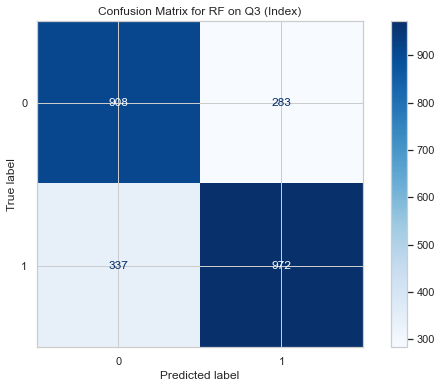

In [121]:
## Plot the confusion Matrix
fig, ax= plt.subplots(figsize=(10, 6))
m.plot_confusion_matrix(rf_mod_iq3, test_Xi3, test_yi3,
                        cmap=plt.cm.Blues, ax=ax)
ax.set_title('Confusion Matrix for RF on Q3 (Index)')
fig.savefig("visualizations/cm/cmrfiq3.png", dpi=400)

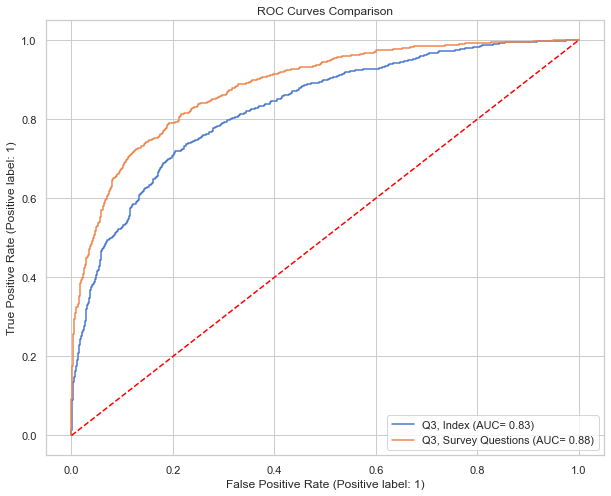

In [122]:
fig, ax= plt.subplots(figsize= (10, 8))
m.plot_roc_curve(rf_mod_iq3, test_Xi3, test_yi3,ax= ax, label= "Q3, Index (AUC= 0.83)")
m.plot_roc_curve(rf_mod_bq3, test_X3, test_y3, ax= ax, label= "Q3, Survey Questions (AUC= 0.88)")
plt.plot([0,1],[0,1], 'k--', color= "red")
ax.set_title("ROC Curves Comparison")
plt.savefig("visualizations/roc/roc_curve_q3.png", dpi= 400)

In [ ]:
gen_PI_plot(rf_mod_iq3, train_Xi3, train_yi3, "iq3")

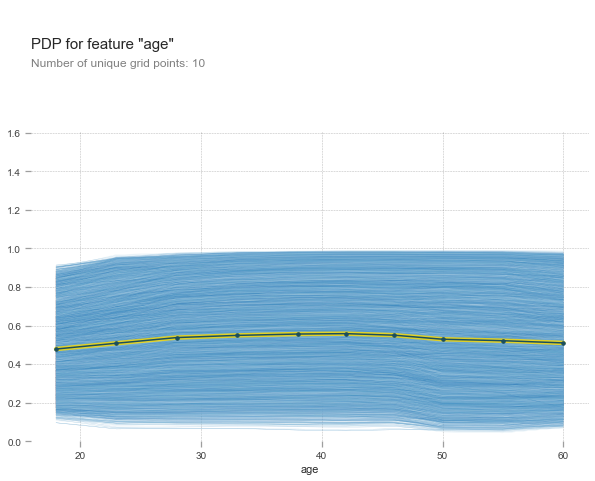

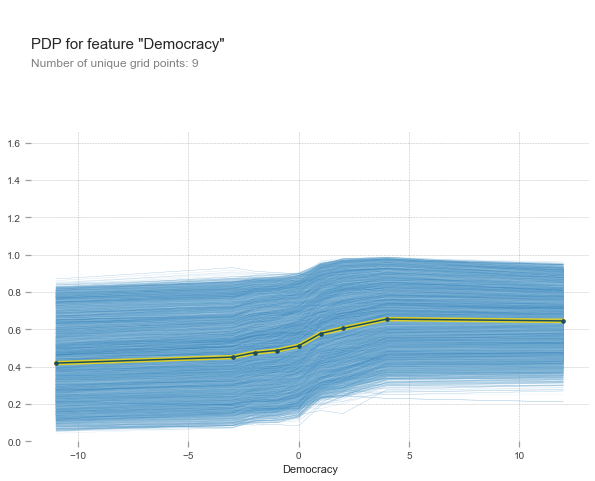

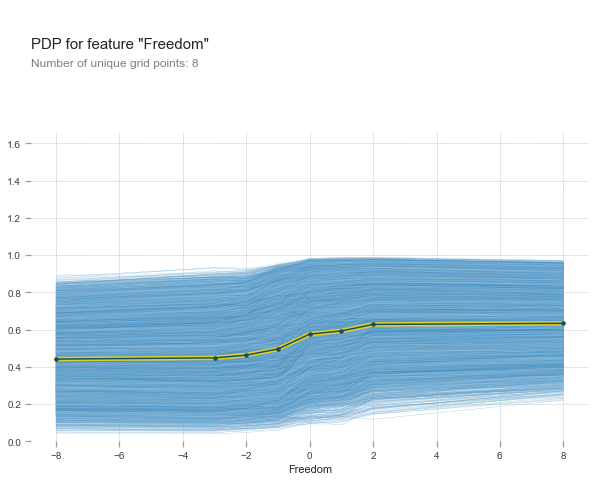

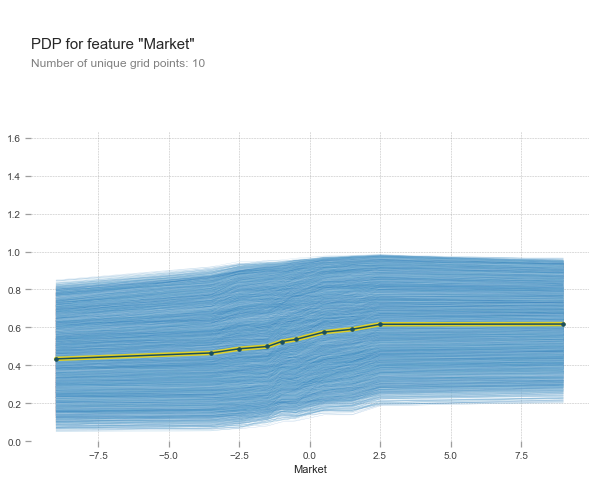

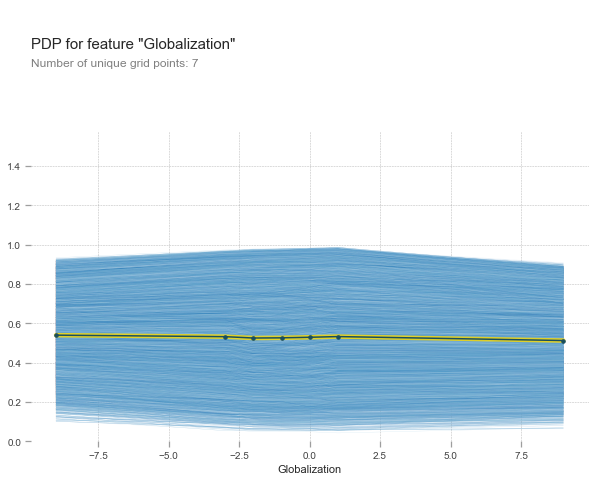

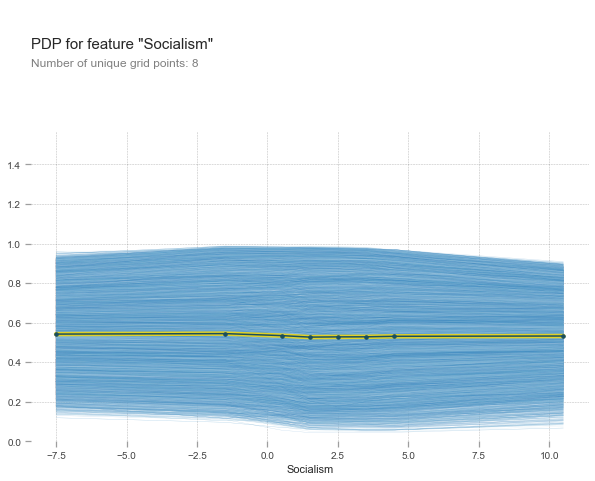

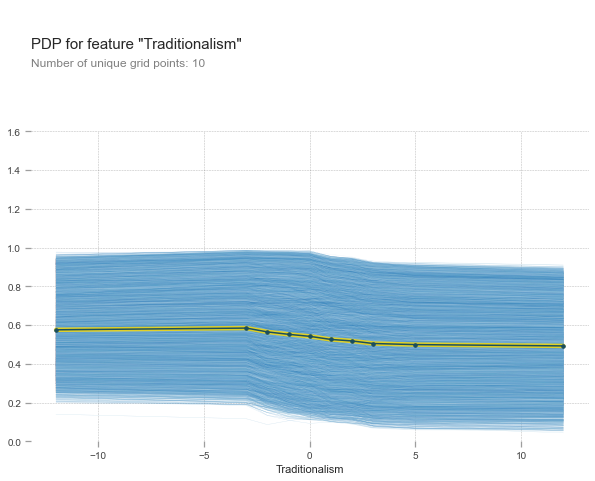

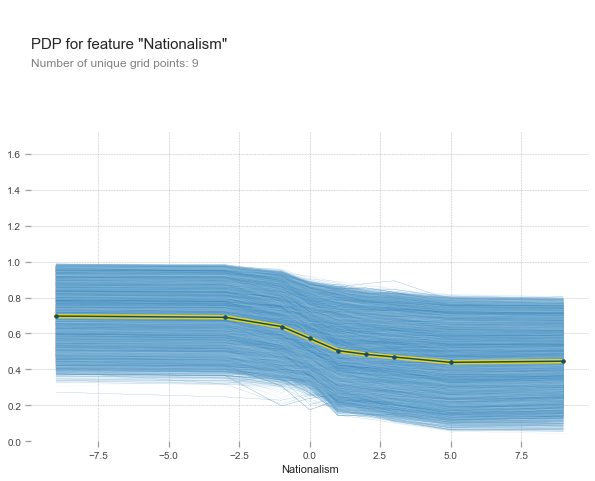

In [123]:
index_list=  ['age', "Democracy", "Freedom", "Market", "Globalization", "Socialism", "Traditionalism", "Nationalism"]
gen_ice_plot(rf_mod_iq3, index_list, train_Xi3, name= "iq3")

###  `q5`~binary-scale questions

In [124]:
search_bq5 = GridSearchCV(pipe, search_space, 
                      cv = fold_generator,
                      scoring='roc_auc',
                      n_jobs=4)

In [125]:
search_bq5.fit(train_X5,train_y5)

GridSearchCV(cv=KFold(n_splits=10, random_state=1234, shuffle=True),
             estimator=Pipeline(steps=[('pre_process', MinMaxScaler()),
                                       ('model', None)]),
             n_jobs=4,
             param_grid=[{'model': [KNeighborsClassifier()],
                          'model__n_neighbors': [5, 10, 15, 20, 30, 40, 50]},
                         {'model': [DecisionTreeClassifier()],
                          'model__max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
                         {'model': [RandomForestClassifier(max_depth=10,
                                                           n_estimators=1000)],
                          'model__max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'model__n_estimators': [10, 250, 500, 750, 1000]}],
             scoring='roc_auc')

In [126]:
print(search_bq5.best_score_, search_bq5.best_params_)

0.7526602746223152 {'model': RandomForestClassifier(max_depth=10, n_estimators=1000), 'model__max_depth': 10, 'model__n_estimators': 1000}


In [130]:
rf_mod_bq5= search_bq5.best_estimator_
print("Accuracy score (Training):", m.accuracy_score(train_y5,rf_mod_bq5.predict(train_X5)), '\n'
      "ROC AUC score (Training):", m.roc_auc_score(train_y5,rf_mod_bq5.predict_proba(train_X5)[:,1]), '\n'
      "F1 score (Training):", m.f1_score(train_y5, rf_mod_bq5.predict(train_X5)), '\n'
      "Accuracy core (Test):", m.accuracy_score(test_y5, rf_mod_bq5.predict(test_X5)), '\n'
      "ROC AUC score (Test):",m.roc_auc_score(test_y5,rf_mod_bq5.predict_proba(test_X5)[:,1]), '\n'
      "F1 score (Test):", m.f1_score(test_y5, rf_mod_bq5.predict(test_X5)))

Accuracy score (Training): 0.9076 
ROC AUC score (Training): 0.967487543370506 
F1 score (Training): 0.918918918918919 
Accuracy core (Test): 0.6932 
ROC AUC score (Test): 0.758466477824022 
F1 score (Test): 0.7510548523206751


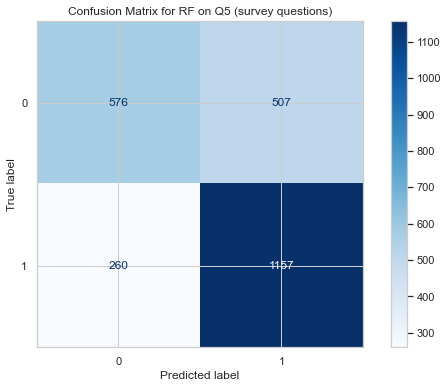

In [131]:
## Plot the confusion Matrix
fig, ax = plt.subplots(figsize=(10, 6))
m.plot_confusion_matrix(rf_mod_bq5, test_X5, test_y5,
                        cmap=plt.cm.Blues, ax=ax)
ax.set_title('Confusion Matrix for RF on Q5 (survey questions)')
fig.savefig("visualizations/cm/cmrfbq5.png", dpi=400)

In [ ]:
gen_PI_plot(rf_mod_bq5, train_X5, train_y5, "bq5")

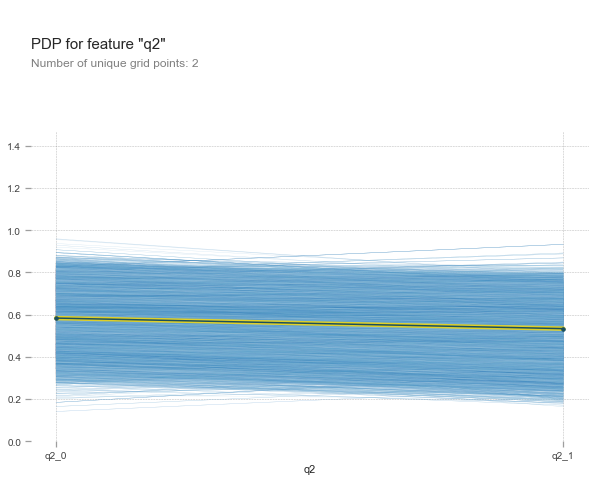

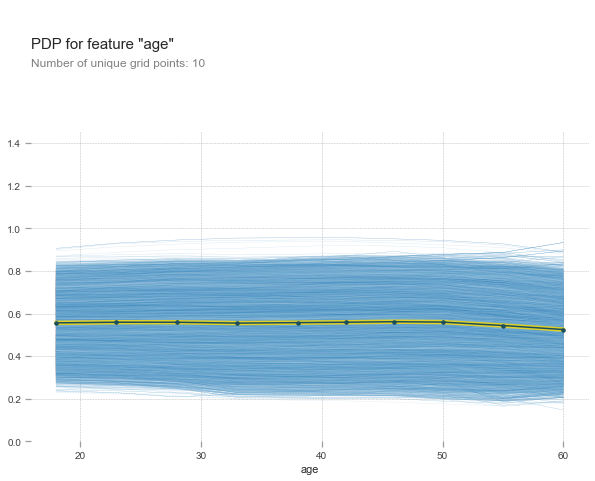

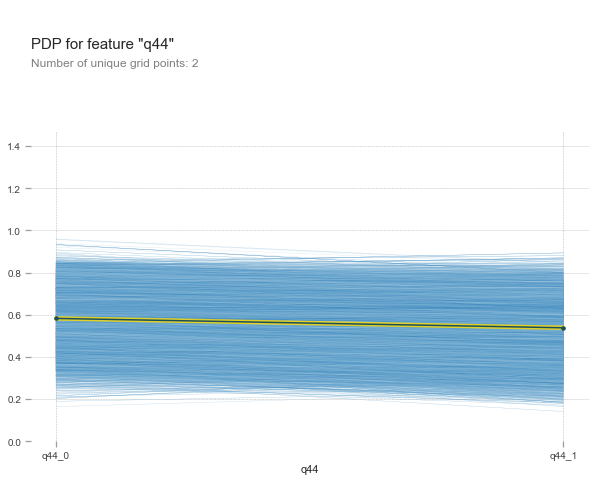

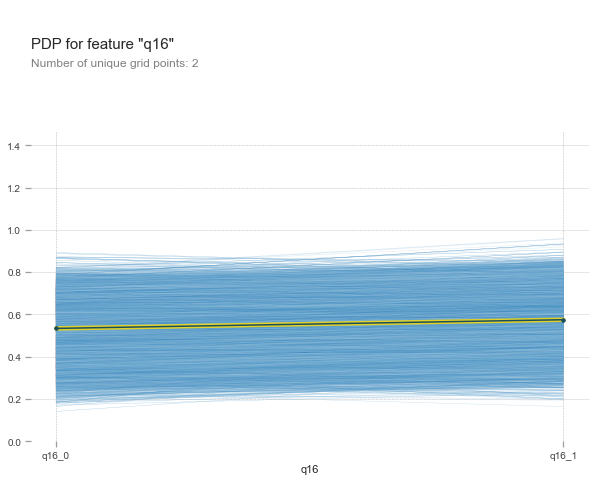

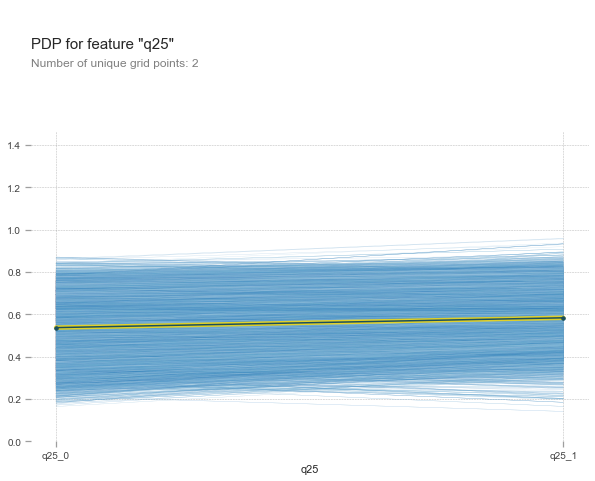

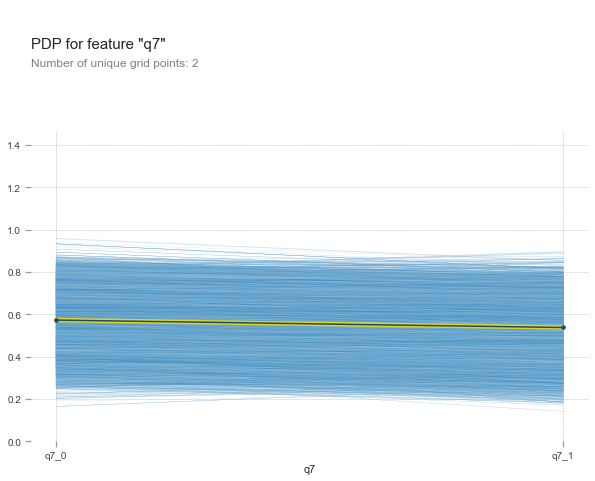

In [132]:
bq5_list= ['q2', 'age', 'q44', 'q16', 'q25', 'q7']
gen_ice_plot(rf_mod_bq5, bq5_list, train_X5, name="bq5")

### `q5`~Index

In [133]:
search_iq5 = GridSearchCV(pipe, search_space, 
                      cv = fold_generator,
                      scoring='roc_auc',
                      n_jobs=4)

search_iq5.fit(train_Xi5,train_yi5)

GridSearchCV(cv=KFold(n_splits=10, random_state=1234, shuffle=True),
             estimator=Pipeline(steps=[('pre_process', MinMaxScaler()),
                                       ('model', None)]),
             n_jobs=4,
             param_grid=[{'model': [KNeighborsClassifier()],
                          'model__n_neighbors': [5, 10, 15, 20, 30, 40, 50]},
                         {'model': [DecisionTreeClassifier()],
                          'model__max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
                         {'model': [RandomForestClassifier(max_depth=10,
                                                           n_estimators=1000)],
                          'model__max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'model__n_estimators': [10, 250, 500, 750, 1000]}],
             scoring='roc_auc')

In [134]:
print(search_iq5.best_score_, search_iq5.best_params_)

0.6950550453722011 {'model': RandomForestClassifier(max_depth=10, n_estimators=1000), 'model__max_depth': 10, 'model__n_estimators': 1000}


In [135]:
rf_mod_iq5= search_iq5.best_estimator_

print("Accuracy score (Training):", m.accuracy_score(train_yi5,rf_mod_iq5.predict(train_Xi5)), '\n'
      "ROC AUC score (Training):", m.roc_auc_score(train_yi5,rf_mod_iq5.predict_proba(train_Xi5)[:,1]), '\n'
      "F1 score (Test):", m.f1_score(train_yi5, rf_mod_iq5.predict(train_Xi5)), '\n'
      "Accuracy score (Test):", m.accuracy_score(test_yi5,rf_mod_iq5.predict(test_Xi5)), '\n'
      "ROC AUC score (Test):", m.roc_auc_score(test_yi5,rf_mod_iq5.predict_proba(test_Xi5)[:,1]),'\n'
      "F1 score (Test):",  m.f1_score(test_yi5, rf_mod_iq5.predict(test_Xi5)))

Accuracy score (Training): 0.784 
ROC AUC score (Training): 0.898835033148172 
F1 score (Test): 0.8294736842105263 
Accuracy score (Test): 0.6524 
ROC AUC score (Test): 0.6982492631683208 
F1 score (Test): 0.7302080099348028


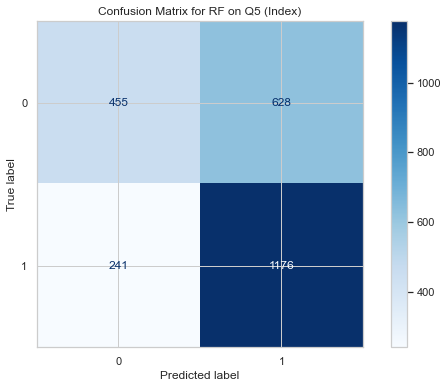

In [136]:
## Plot the confusion Matrix
fig, ax = plt.subplots(figsize=(10, 6))
m.plot_confusion_matrix(rf_mod_iq5, test_Xi5, test_yi5,
                        cmap=plt.cm.Blues, ax=ax)
ax.set_title('Confusion Matrix for RF on Q5 (Index)')
fig.savefig("visualizations/cm/cmrfiq5.png", dpi=400)

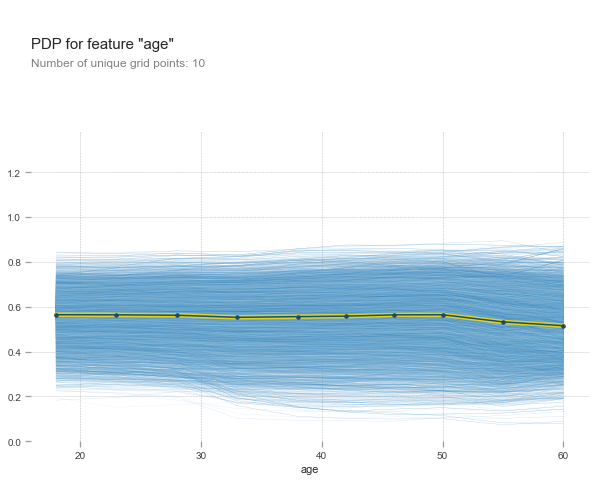

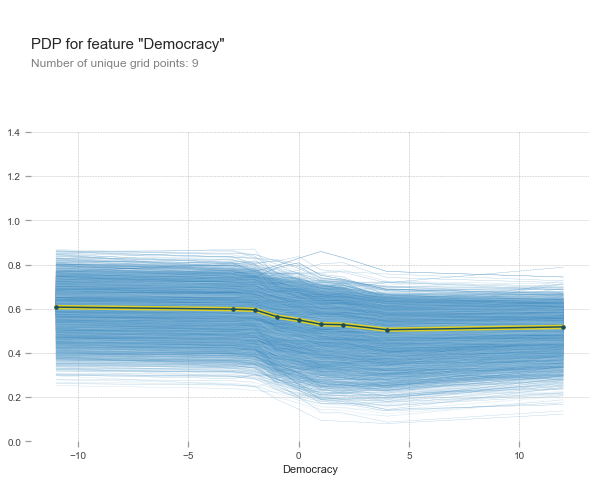

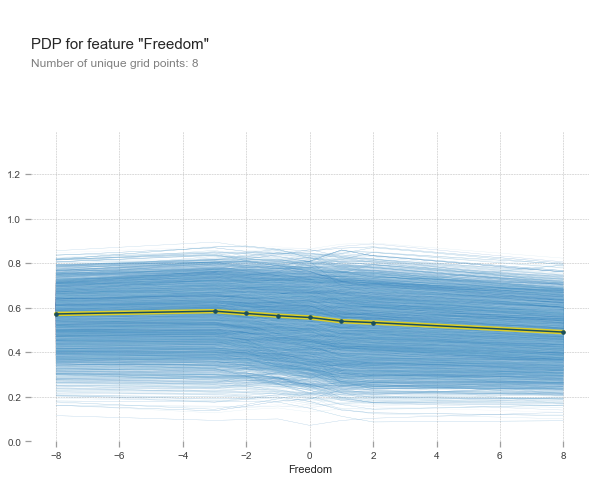

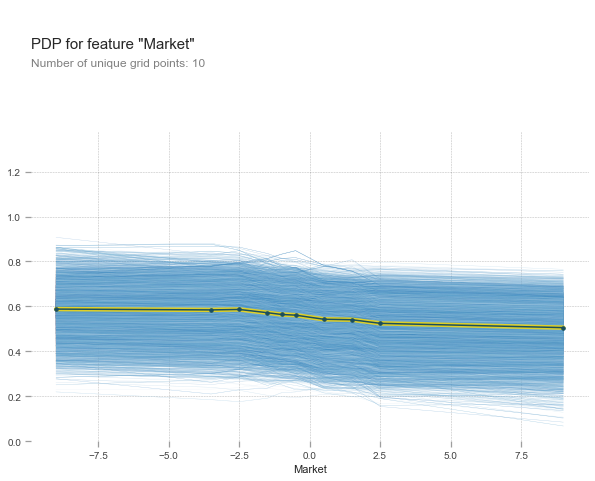

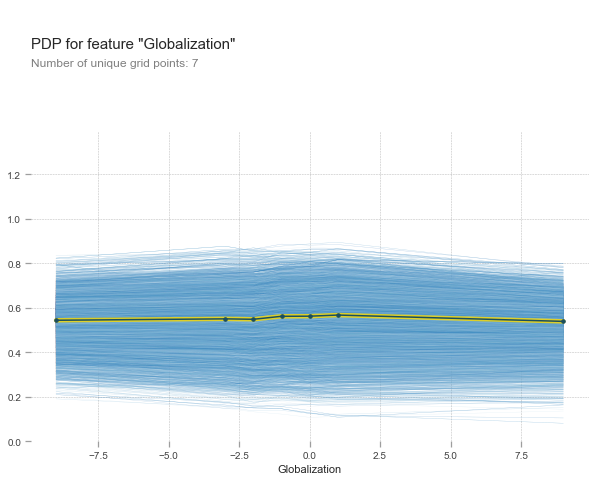

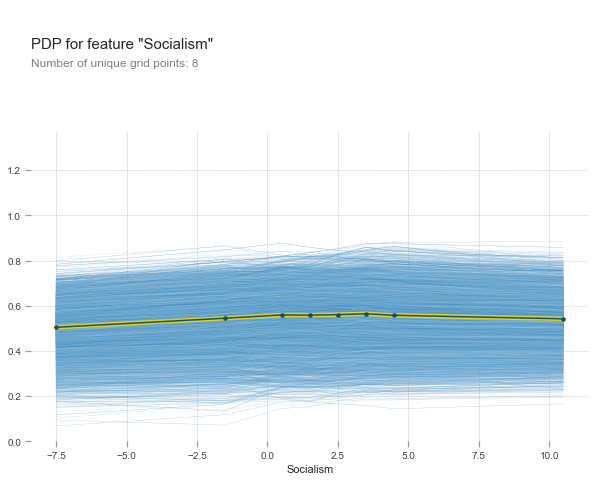

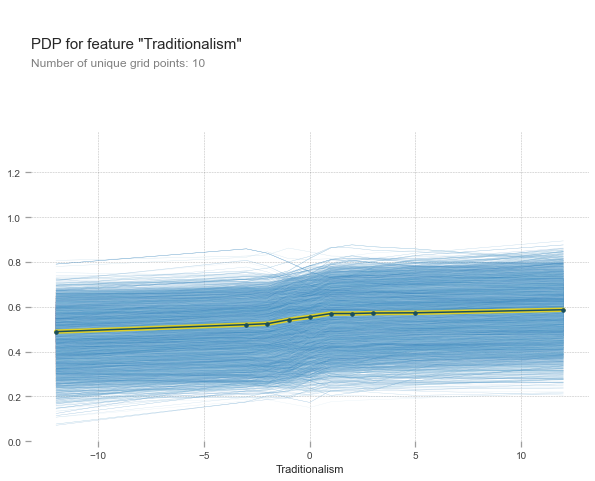

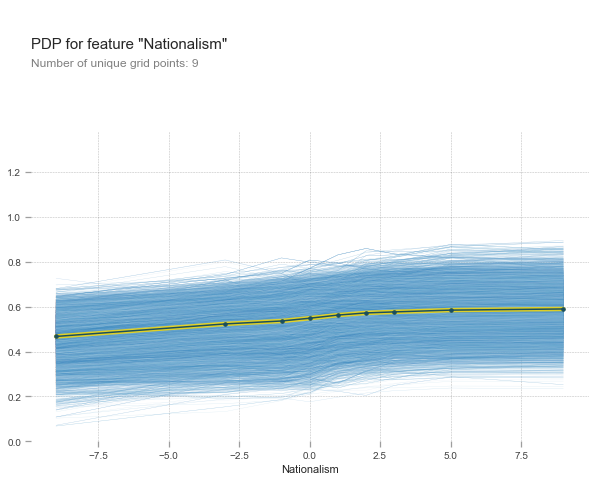

In [137]:
gen_ice_plot(rf_mod_iq5, index_list, train_Xi5, name= "iq5")

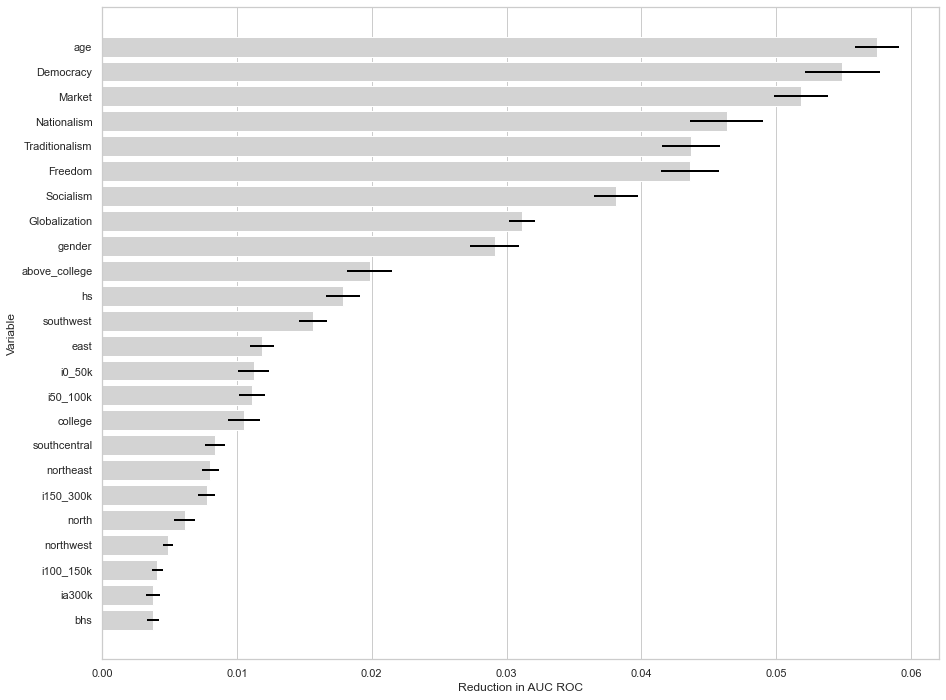

In [257]:
## With 25 repeat to get a more accurate estimation
vi= permutation_importance(rf_mod_iq5, train_Xi5, train_yi5, n_repeats=25)

## Organize as a data frame 
vi_dat= pd.DataFrame(dict(variable=train_Xi5.columns,
                           vi= vi['importances_mean'],
                           std= vi['importances_std']))

vi_dat = vi_dat.sort_values(by= "vi",ascending=False).reset_index(drop=True)
vi_dat

f,ax = plt.subplots(figsize=(15, 12))
sns.set_style("whitegrid")
sns.barplot(x="vi", y= "variable", data= vi_dat, color= "lightgray")
ax.errorbar(x= 'vi', y= "variable", xerr= 'std', data= vi_dat, ls= "None",
            ecolor= "black", capthick=0.2, elinewidth=2)
ax.set_xlabel("Reduction in AUC ROC")
ax.set_ylabel("Variable")
f.savefig("fi_iq5.png", dpi=400)

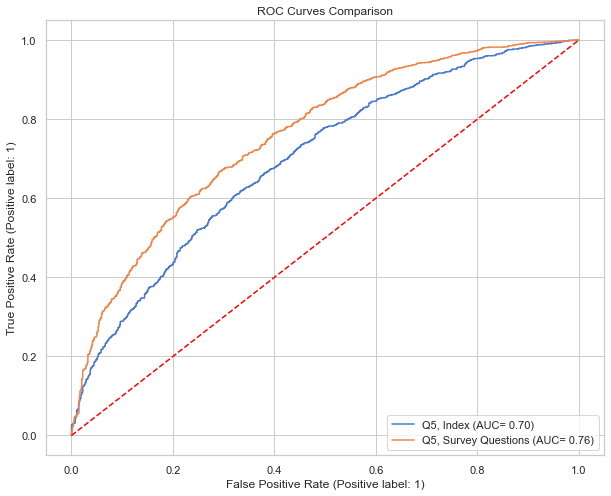

In [138]:
## ROC Curve
fig, ax= plt.subplots(figsize=(10, 8))
m.plot_roc_curve(rf_mod_iq5, test_Xi5, test_yi5, ax= ax, label= "Q5, Index (AUC= 0.70)")
m.plot_roc_curve(rf_mod_bq5, test_X5, test_y5, ax= ax, label= "Q5, Survey Questions (AUC= 0.76)")
plt.plot([0,1],[0,1], 'k--', color= "red")
ax.set_title("ROC Curves Comparison")
plt.savefig("visualizations/roc/roc_curve_q5.png", dpi=400)

### `qs0`~Index

In [139]:
sm= SMOTE(random_state=123)
Xiqs0_sm,yiqs0_sm= sm.fit_resample(Xiqs0,yiqs0)

In [140]:
print(yiqs0_sm.value_counts(normalize=True))

0    0.5
1    0.5
Name: qs0, dtype: float64


In [141]:
train_Xiqs0_sm, test_Xiqs0_sm, train_yiqs0_sm, test_yiqs0_sm= train_test_split(Xiqs0_sm,yiqs0_sm,
                                                                   test_size = .25, random_state=123)

In [142]:
search_iqs0_sm= GridSearchCV(pipe, search_space, 
                      cv= fold_generator,
                      scoring='roc_auc',
                      n_jobs=4)

search_iqs0_sm.fit(train_Xiqs0_sm,train_yiqs0_sm)

GridSearchCV(cv=KFold(n_splits=10, random_state=1234, shuffle=True),
             estimator=Pipeline(steps=[('pre_process', MinMaxScaler()),
                                       ('model', None)]),
             n_jobs=4,
             param_grid=[{'model': [KNeighborsClassifier()],
                          'model__n_neighbors': [5, 10, 15, 20, 30, 40, 50]},
                         {'model': [DecisionTreeClassifier()],
                          'model__max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
                         {'model': [RandomForestClassifier(max_depth=10,
                                                           n_estimators=750)],
                          'model__max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'model__n_estimators': [10, 250, 500, 750, 1000]}],
             scoring='roc_auc')

In [143]:
rf_iqs0_sm= search_iqs0_sm.best_estimator_
print(search_iqs0_sm.best_score_, search_iqs0_sm.best_params_)

0.9449770709233476 {'model': RandomForestClassifier(max_depth=10, n_estimators=750), 'model__max_depth': 10, 'model__n_estimators': 750}


In [144]:
search_iqs0= GridSearchCV(pipe, search_space, 
                      cv= fold_generator,
                      scoring='roc_auc',
                      n_jobs=4)

search_iqs0.fit(train_Xiqs0,train_yiqs0)

rf_iqs0= search_iqs0.best_estimator_
print(search_iqs0.best_score_, search_iqs0.best_params_)

0.731326148004059 {'model': RandomForestClassifier(max_depth=10, n_estimators=750), 'model__max_depth': 10, 'model__n_estimators': 750}


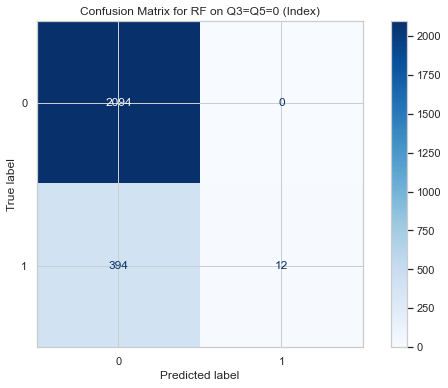

In [145]:
## Plot the confusion Matrix
fig, ax = plt.subplots(figsize=(10, 6))
m.plot_confusion_matrix(rf_iqs0, test_Xiqs0, test_yiqs0,
                        cmap=plt.cm.Blues, ax=ax)
ax.set_title('Confusion Matrix for RF on Q3=Q5=0 (Index)')
fig.savefig("visualizations/cm/cmrfiqs0.png", dpi=400)

In [146]:
print("Accuracy core (train):", m.accuracy_score(train_yiqs0_sm, rf_iqs0_sm.predict(train_Xiqs0_sm)), '\n'
      "ROC Auc core (train):", m.roc_auc_score(train_yiqs0_sm, rf_iqs0_sm.predict_proba(train_Xiqs0_sm)[:,1]), '\n'
      "F1 score (train):", m.f1_score(train_yiqs0_sm, rf_iqs0_sm.predict(train_Xiqs0_sm))
      "Accuracy core (Test):", m.accuracy_score(test_yiqs0_sm, rf_iqs0_sm.predict(test_Xiqs0_sm)), '\n'
      "ROC Auc core (Test):", m.roc_auc_score(test_yiqs0_sm, rf_iqs0_sm.predict_proba(test_Xiqs0_sm)[:,1]), '\n'
       "F1 score (Test):", m.f1_score(test_yiqs0_sm, rf_iqs0_sm.predict(test_Xiqs0_sm)))

## Plot the confusion Matrix
fig, ax = plt.subplots(figsize=(10, 6))
m.plot_confusion_matrix(rf_iqs0_sm, test_Xiqs0_sm, test_yiqs0_sm,
                        cmap=plt.cm.Blues, ax=ax)
ax.set_title('Confusion Matrix for RF on Q3=Q5=0 (Index)')
fig.savefig("visualizations/cm/cmrfiqs0_sm.png", dpi=400)

SyntaxError: invalid syntax (<ipython-input-146-71549a87a351>, line 4)

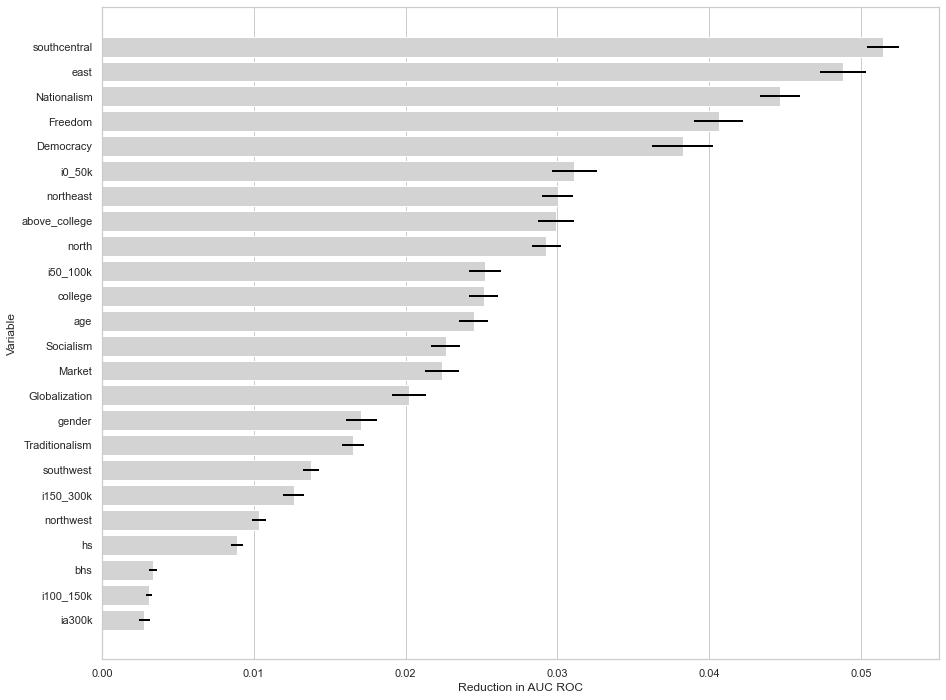

In [258]:
gen_PI_plot()

### `qs0`~Binary-Scale

In [148]:
## Resample and Train-test Split
Xi0_sm, yi0_sm = sm.fit_resample(Xi0, yi0)
train_Xi0_sm, test_Xi0_sm, train_yi0_sm, test_yi0_sm= train_test_split(Xi0_sm,yi0_sm,
                                                                       test_size = .25, random_state=123)

In [149]:
search_i0_sm= GridSearchCV(pipe, search_space, 
                      cv= fold_generator,
                      scoring='roc_auc',
                      n_jobs=4)

search_i0_sm.fit(train_Xi0_sm,train_yi0_sm)

GridSearchCV(cv=KFold(n_splits=10, random_state=1234, shuffle=True),
             estimator=Pipeline(steps=[('pre_process', MinMaxScaler()),
                                       ('model', None)]),
             n_jobs=4,
             param_grid=[{'model': [KNeighborsClassifier()],
                          'model__n_neighbors': [5, 10, 15, 20, 30, 40, 50]},
                         {'model': [DecisionTreeClassifier()],
                          'model__max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
                         {'model': [RandomForestClassifier(max_depth=10,
                                                           n_estimators=750)],
                          'model__max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'model__n_estimators': [10, 250, 500, 750, 1000]}],
             scoring='roc_auc')

In [150]:
print(search_i0_sm.best_score_, search_i0_sm.best_params_)
knn_mod_i0_sm= search_i0_sm.best_estimator_

0.954920598722684 {'model': KNeighborsClassifier(), 'model__n_neighbors': 5}


In [151]:
print("Accuracy score (Training):", m.accuracy_score(train_yi0,knn_mod_i0_sm.predict(train_Xi0)), '\n'
      "ROC AUC score (Training):", m.roc_auc_score(train_yi0,knn_mod_i0_sm.predict_proba(train_Xi0)[:,1]), '\n'
      "F1 score (Test):", m.f1_score(train_yi0, knn_mod_i0_sm.predict(train_Xi0)), '\n'
      "Accuracy score (Test):", m.accuracy_score(test_yi0,knn_mod_i0_sm.predict(test_Xi0)), '\n'
      "ROC AUC score (Test):", m.roc_auc_score(test_yi0,knn_mod_i0_sm.predict_proba(test_Xi0)[:,1]),'\n'
      "F1 score (Test):",  m.f1_score(test_yi0, knn_mod_i0_sm.predict(test_Xi0)))

Accuracy score (Training): 0.8050666666666667 
ROC AUC score (Training): 0.9699662720000001 
F1 score (Test): 0.6231958762886598 
Accuracy score (Test): 0.784 
ROC AUC score (Test): 0.9567736342635068 
F1 score (Test): 0.5921450151057402


In [152]:
search_i0_sm.cv_results_['rank_test_score']

array([ 1,  2,  7,  8, 14, 20, 21, 61, 60, 59, 57, 51, 45, 38, 39, 44, 58,
       52, 56, 54, 55, 53, 47, 50, 49, 48, 46, 43, 40, 41, 42, 37, 36, 35,
       33, 34, 32, 28, 31, 29, 30, 27, 25, 22, 24, 23, 26, 18, 16, 17, 15,
       19, 12, 11, 10,  9, 13,  6,  5,  4,  3], dtype=int32)

In [153]:
## RF ranked as third
rf_mod_i0_sm= RF(max_depth= 10, n_estimators= 1000)
rf_mod_i0_sm.fit(train_Xi0_sm,train_yi0_sm)

RandomForestClassifier(max_depth=10, n_estimators=1000)

In [157]:
print("Accuracy score (Training):", m.accuracy_score(train_yi0_sm,rf_mod_i0_sm.predict(train_Xi0_sm)), '\n'
      "ROC AUC score (Training):", m.roc_auc_score(train_yi0_sm,rf_mod_i0_sm.predict_proba(train_Xi0_sm)[:,1]), '\n'
      "F1 score (Test):", m.f1_score(train_yi0_sm, rf_mod_i0_sm.predict(train_Xi0_sm)), '\n'
      "Accuracy score (Test):", m.accuracy_score(test_yi0_sm,rf_mod_i0_sm.predict(test_Xi0_sm)), '\n'
      "ROC AUC score (Test):", m.roc_auc_score(test_yi0_sm,rf_mod_i0_sm.predict_proba(test_Xi0_sm)[:,1]),'\n'
      "F1 score (Test):",  m.f1_score(test_yi0_sm, rf_mod_i0_sm.predict(test_Xi0_sm)))

Accuracy score (Training): 0.9323266219239373 
ROC AUC score (Training): 0.9843178020460525 
F1 score (Test): 0.9340188517566409 
Accuracy score (Test): 0.8664908916586769 
ROC AUC score (Test): 0.9400699413845599 
F1 score (Test): 0.8674756126576256


In [155]:
search_i0= GridSearchCV(pipe, search_space, 
                      cv= fold_generator,
                      scoring='roc_auc',
                      n_jobs=4)

search_i0.fit(train_Xi0,train_yi0)

GridSearchCV(cv=KFold(n_splits=10, random_state=1234, shuffle=True),
             estimator=Pipeline(steps=[('pre_process', MinMaxScaler()),
                                       ('model', None)]),
             n_jobs=4,
             param_grid=[{'model': [KNeighborsClassifier()],
                          'model__n_neighbors': [5, 10, 15, 20, 30, 40, 50]},
                         {'model': [DecisionTreeClassifier()],
                          'model__max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
                         {'model': [RandomForestClassifier(max_depth=10,
                                                           n_estimators=500)],
                          'model__max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'model__n_estimators': [10, 250, 500, 750, 1000]}],
             scoring='roc_auc')

In [166]:
print(search_i0.best_score_, search_i0.best_params_)
rf_mod_i0= search_i0.best_estimator_

0.772915862345448 {'model': RandomForestClassifier(max_depth=10, n_estimators=500), 'model__max_depth': 10, 'model__n_estimators': 500}


In [167]:
print("Accuracy score (Training):", m.accuracy_score(train_yi0,rf_mod_i0.predict(train_Xi0)), '\n'
      "ROC AUC score (Training):", m.roc_auc_score(train_yi0,rf_mod_i0.predict_proba(train_Xi0)[:,1]), '\n'
      "F1 score (Test):", m.f1_score(train_yi0, rf_mod_i0.predict(train_Xi0)), '\n'
      "Accuracy score (Test):", m.accuracy_score(test_yi0,rf_mod_i0.predict(test_Xi0)), '\n'
      "ROC AUC score (Test):", m.roc_auc_score(test_yi0,rf_mod_i0.predict_proba(test_Xi0)[:,1]),'\n'
      "F1 score (Test):",  m.f1_score(test_yi0, rf_mod_i0.predict(test_Xi0)))

Accuracy score (Training): 0.8642666666666666 
ROC AUC score (Training): 0.996615936 
F1 score (Test): 0.3130904183535762 
Accuracy score (Test): 0.8484 
ROC AUC score (Test): 0.7894617979589821 
F1 score (Test): 0.12471131639722863


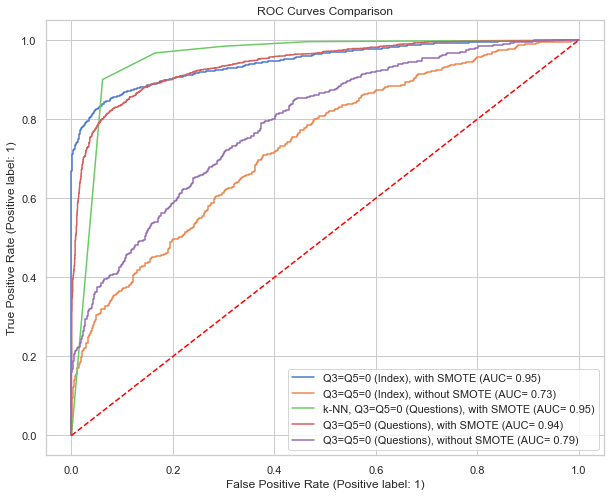

In [171]:
fig, ax= plt.subplots(figsize=(10, 8))
m.plot_roc_curve(rf_iqs0_sm, test_Xiqs0_sm, test_yiqs0_sm, ax= ax, label= "Q3=Q5=0 (Index), with SMOTE (AUC= 0.95)")
m.plot_roc_curve(rf_iqs0, test_Xiqs0, test_yiqs0, ax= ax, label= "Q3=Q5=0 (Index), without SMOTE (AUC= 0.73)")
m.plot_roc_curve(knn_mod_i0_sm, test_Xi0_sm, test_yi0_sm, ax= ax, label= "k-NN, Q3=Q5=0 (Questions), with SMOTE (AUC= 0.95)" )
m.plot_roc_curve(rf_mod_i0_sm, test_Xi0_sm, test_yi0_sm, ax= ax, label= "Q3=Q5=0 (Questions), with SMOTE (AUC= 0.94)")
m.plot_roc_curve(rf_mod_i0, test_Xi0, test_yi0, ax= ax, label= "Q3=Q5=0 (Questions), without SMOTE (AUC= 0.79)")
plt.plot([0,1],[0,1], 'k--', color= "red")
ax.set_title("ROC Curves Comparison")
plt.savefig("visualizations/roc/roc_curve_qs0.png", dpi=400)

#### Permutation Importance & ICE Plot

In [176]:
import eli5 
from eli5.sklearn import PermutationImportance

In [189]:
perm_train= PermutationImportance(rf_mod_i0_sm, n_iter=5,random_state=123)
perm_train.fit(test_Xi0_sm,test_yi0_sm)

PermutationImportance(estimator=RandomForestClassifier(max_depth=10,
                                                       n_estimators=1000),
                      random_state=123)

In [190]:
vi= eli5.explain_weights_df(perm_train,feature_names = list(train_Xi0_sm))

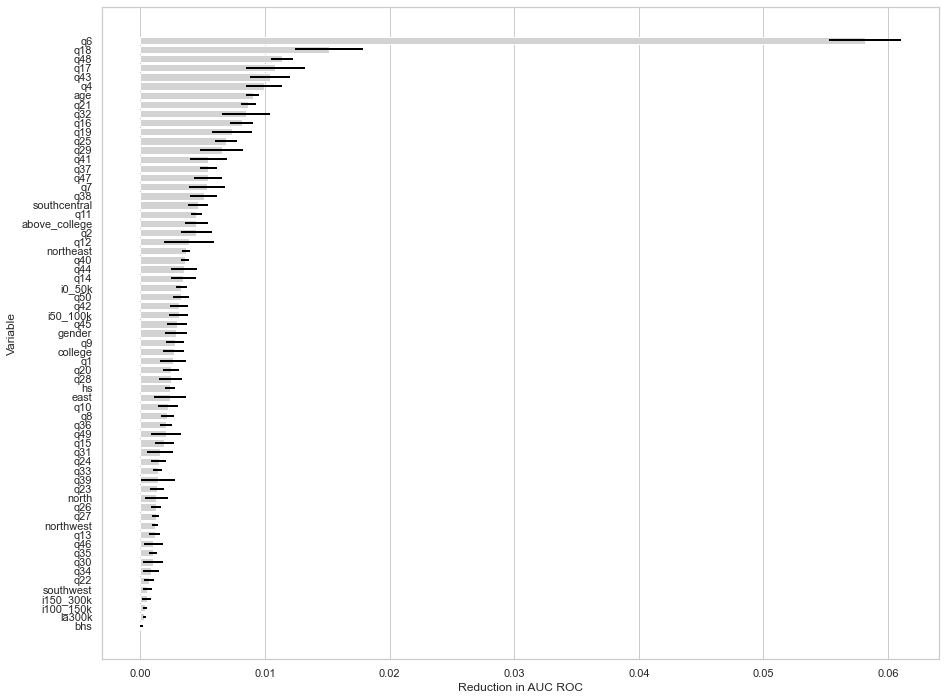

In [228]:
f,ax = plt.subplots(figsize=(15, 12))
sns.set_style("whitegrid")
sns.barplot(x="weight", y= "feature", data= vi, color= "lightgray")
ax.errorbar(x= 'weight', y= "feature", xerr= 'std', data= vi, ls= "None",
            ecolor= "black", capthick=0.2, elinewidth=2)
ax.set_xlabel("Reduction in AUC ROC")
ax.set_ylabel("Variable")
f.savefig("visualizations/pi/fi_i0_sm.png", dpi=400)

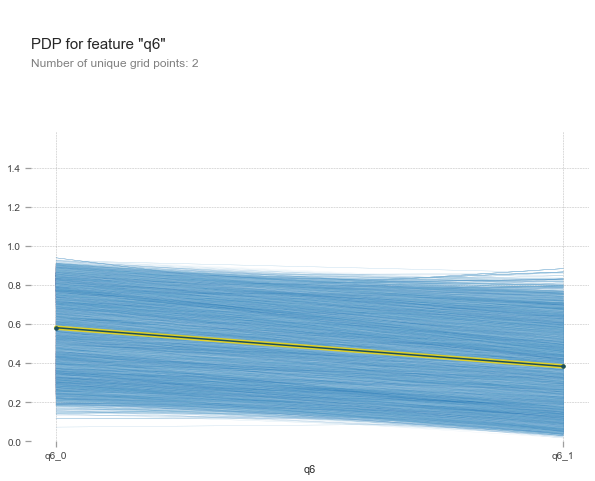

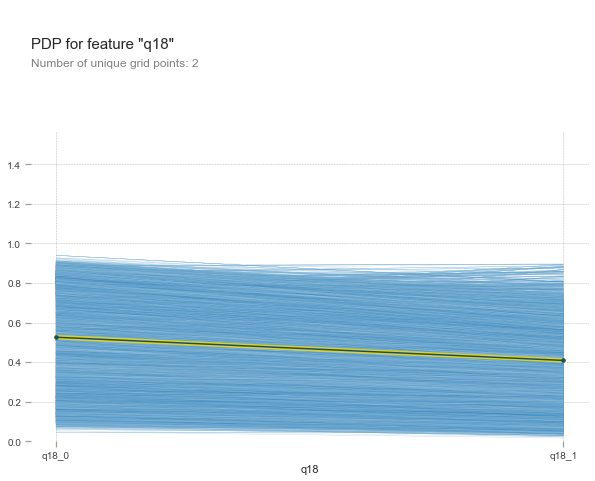

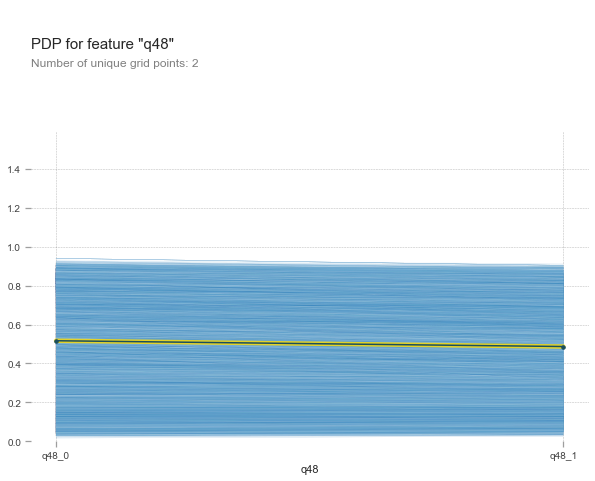

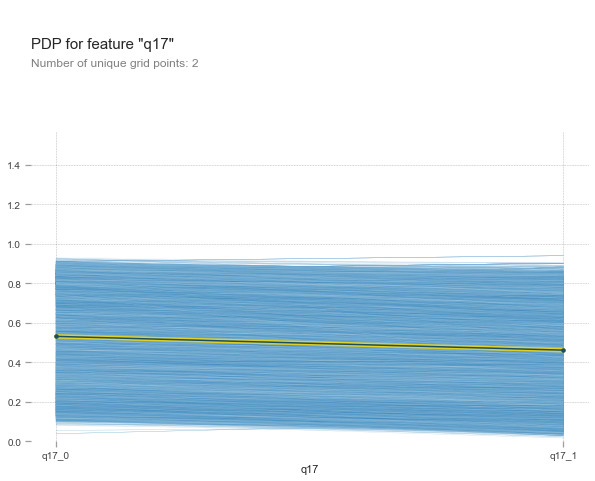

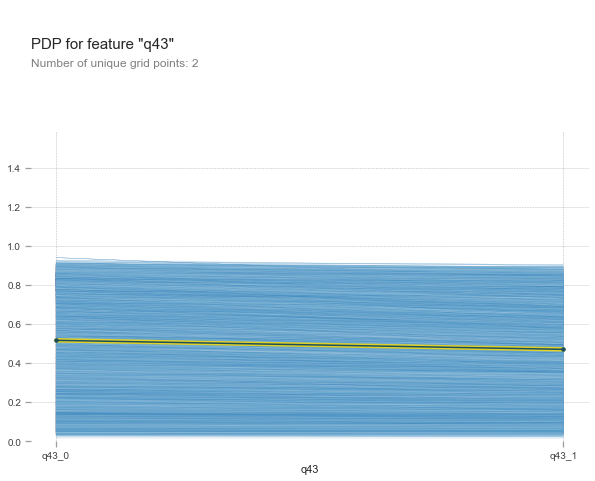

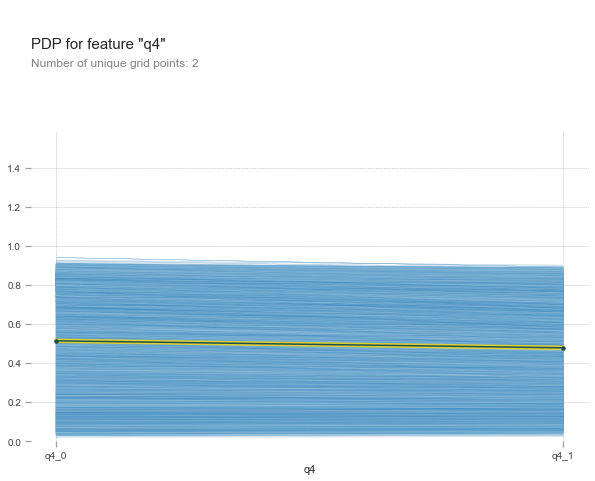

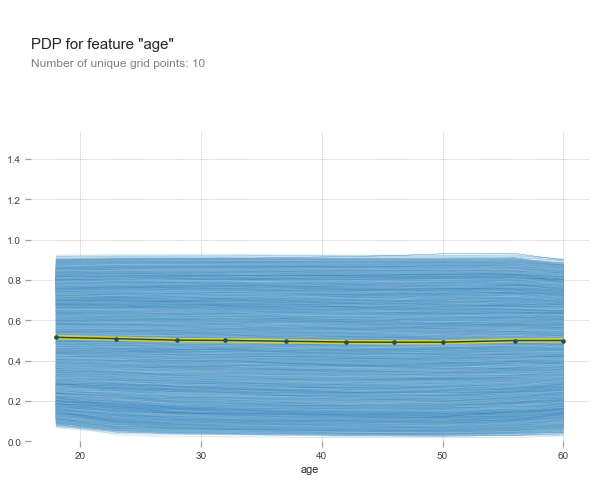

In [188]:
i0_list= ['q6', 'q18', 'q48', 'q17', 'q43', 'q4', 'age']
gen_ice_plot(rf_mod_i0_sm, i0_list, train_Xi0_sm, name= "i0_sm")

### `qs2`

In [192]:
## Use smote
Xiqs2_sm, yiqs2_sm = sm.fit_resample(Xiqs2, yiqs2)
train_Xiqs2_sm, test_Xiqs2_sm, train_yiqs2_sm, test_yiqs2_sm= train_test_split(Xiqs2_sm,yiqs2_sm,
                                                                        test_size = .25,random_state=123)

In [194]:
search_iqs2_sm= GridSearchCV(pipe, search_space, 
                      cv= fold_generator,
                      scoring='roc_auc',
                      n_jobs=4)

search_iqs2_sm.fit(train_Xiqs2_sm,train_yiqs2_sm)

rf_iqs2_sm= search_iqs2_sm.best_estimator_
print(search_iqs2_sm.best_score_, search_iqs2_sm.best_params_)

print("Accuracy core (train):", m.accuracy_score(train_yiqs2_sm, rf_iqs2_sm.predict(train_Xiqs2_sm)), '\n'
      "ROC Auc core (train):", m.roc_auc_score(train_yiqs2_sm, rf_iqs2_sm.predict_proba(train_Xiqs2_sm)[:,1]), '\n'
       "F1 score (train):", m.f1_score(train_yiqs2_sm, rf_iqs2_sm.predict(train_Xiqs2_sm)))

0.8955444399390855 {'model': RandomForestClassifier(max_depth=10, n_estimators=1000), 'model__max_depth': 10, 'model__n_estimators': 1000}
Accuracy core (train): 0.8872899535216303 
ROC Auc core (train): 0.9620460390911572 
F1 score (train): 0.8859339665309816


In [195]:
search_iqs2= GridSearchCV(pipe, search_space, 
                      cv= fold_generator,
                      scoring='roc_auc',
                      n_jobs=4)

search_iqs2.fit(train_Xiqs2,train_yiqs2)

GridSearchCV(cv=KFold(n_splits=10, random_state=1234, shuffle=True),
             estimator=Pipeline(steps=[('pre_process', MinMaxScaler()),
                                       ('model', None)]),
             n_jobs=4,
             param_grid=[{'model': [KNeighborsClassifier()],
                          'model__n_neighbors': [5, 10, 15, 20, 30, 40, 50]},
                         {'model': [DecisionTreeClassifier()],
                          'model__max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
                         {'model': [RandomForestClassifier(max_depth=10,
                                                           n_estimators=1000)],
                          'model__max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'model__n_estimators': [10, 250, 500, 750, 1000]}],
             scoring='roc_auc')

0.7123570910428828 {'model': RandomForestClassifier(max_depth=10, n_estimators=1000), 'model__max_depth': 10, 'model__n_estimators': 1000}
Accuracy core (train): 0.7837333333333333 
ROC Auc core (train): 0.9262201028574415 
F1 score (train): 0.26138433515482695 
Accuracy core (Test): 0.7544 
ROC Auc core (Test): 0.6994382403165912 
F1 score (Test): 0.06402439024390243


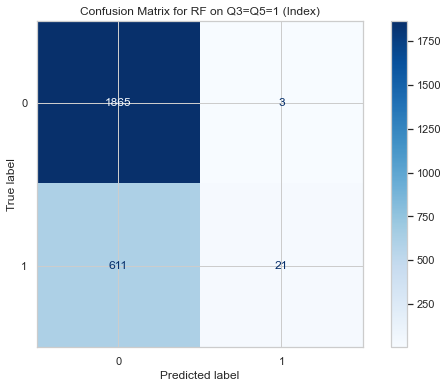

In [204]:
rf_iqs2= search_iqs2.best_estimator_
print(search_iqs2.best_score_, search_iqs2.best_params_)

print("Accuracy core (train):", m.accuracy_score(train_yiqs2, rf_iqs2.predict(train_Xiqs2)), '\n'
      "ROC Auc core (train):", m.roc_auc_score(train_yiqs2, rf_iqs2.predict_proba(train_Xiqs2)[:,1]), '\n'
      "F1 score (train):", m.f1_score(train_yiqs2, rf_iqs2.predict(train_Xiqs2)), '\n'
      "Accuracy core (Test):", m.accuracy_score(test_yiqs2, rf_iqs2.predict(test_Xiqs2)), '\n'
      "ROC Auc core (Test):", m.roc_auc_score(test_yiqs2, rf_iqs2.predict_proba(test_Xiqs2)[:,1]), '\n'
      "F1 score (Test):", m.f1_score(test_yiqs2, rf_iqs2.predict(test_Xiqs2)))

## Plot the confusion Matrix
fig, ax = plt.subplots(figsize=(10, 6))
m.plot_confusion_matrix(rf_iqs2, test_Xiqs2, test_yiqs2,
                        cmap=plt.cm.Blues, ax=ax)
ax.set_title('Confusion Matrix for RF on Q3=Q5=1 (Index)')
fig.savefig("visualizations/cm/cmrfiqs2.png", dpi=400)

Accuracy core (train): 0.8872899535216303 
ROC Auc core (train): 0.9620460390911572 
F1 score (train): 0.8859339665309816 
Accuracy core (Test): 0.8276139410187667 
ROC Auc core (Test): 0.9030500174805873 
F1 score (Test): 0.822718500137855


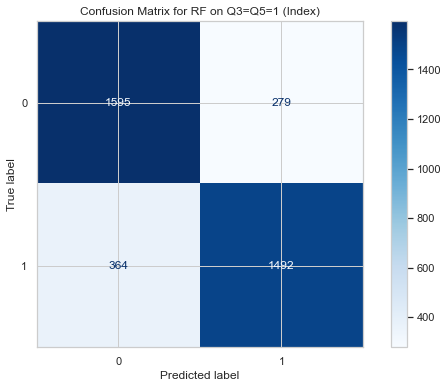

In [197]:
print("Accuracy core (train):", m.accuracy_score(train_yiqs2_sm, rf_iqs2_sm.predict(train_Xiqs2_sm)), '\n'
      "ROC Auc core (train):", m.roc_auc_score(train_yiqs2_sm, rf_iqs2_sm.predict_proba(train_Xiqs2_sm)[:,1]), '\n'
      "F1 score (train):", m.f1_score(train_yiqs2_sm, rf_iqs2_sm.predict(train_Xiqs2_sm)), '\n'
      "Accuracy core (Test):", m.accuracy_score(test_yiqs2_sm, rf_iqs2_sm.predict(test_Xiqs2_sm)), '\n'
      "ROC Auc core (Test):", m.roc_auc_score(test_yiqs2_sm, rf_iqs2_sm.predict_proba(test_Xiqs2_sm)[:,1]), '\n'
      "F1 score (Test):", m.f1_score(test_yiqs2_sm, rf_iqs2_sm.predict(test_Xiqs2_sm)))

## Plot the confusion Matrix
fig, ax = plt.subplots(figsize=(10, 6))
m.plot_confusion_matrix(rf_iqs2_sm, test_Xiqs2_sm, test_yiqs2_sm,
                        cmap=plt.cm.Blues, ax=ax)
ax.set_title('Confusion Matrix for RF on Q3=Q5=1 (Index)')
fig.savefig("visualizations/cm/cmrfiqs2_sm.png", dpi=400)

In [200]:
## Resample and Train-test Split
Xi2_sm, yi2_sm = sm.fit_resample(Xi2, yi2)
train_Xi2_sm, test_Xi2_sm, train_yi2_sm, test_yi2_sm= train_test_split(Xi2_sm,yi2_sm,
                                                                       test_size = .25, random_state=123)

search_i2_sm= GridSearchCV(pipe, search_space, 
                      cv= fold_generator,
                      scoring='roc_auc',
                      n_jobs=4)

search_i2_sm.fit(train_Xi2_sm,train_yi2_sm)

GridSearchCV(cv=KFold(n_splits=10, random_state=1234, shuffle=True),
             estimator=Pipeline(steps=[('pre_process', MinMaxScaler()),
                                       ('model', None)]),
             n_jobs=4,
             param_grid=[{'model': [KNeighborsClassifier()],
                          'model__n_neighbors': [5, 10, 15, 20, 30, 40, 50]},
                         {'model': [DecisionTreeClassifier()],
                          'model__max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
                         {'model': [RandomForestClassifier(max_depth=10,
                                                           n_estimators=1000)],
                          'model__max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'model__n_estimators': [10, 250, 500, 750, 1000]}],
             scoring='roc_auc')

In [203]:
print(search_i2_sm.best_score_, search_i2_sm.best_params_)
knn_mod_i2_sm= search_i2_sm.best_estimator_

0.908871963594771 {'model': KNeighborsClassifier(), 'model__n_neighbors': 5}


In [207]:
rf_mod_i2_sm= RF(max_depth= 12, n_estimators= 1000)
rf_mod_i2_sm.fit(train_Xi2_sm,train_yi2_sm)

RandomForestClassifier(max_depth=12, n_estimators=1000)

In [209]:
print("Accuracy score (Training):", m.accuracy_score(train_yi2_sm,rf_mod_i2_sm.predict(train_Xi2_sm)), '\n'
      "ROC AUC score (Training):", m.roc_auc_score(train_yi2_sm,rf_mod_i2_sm.predict_proba(train_Xi2_sm)[:,1]), '\n'
      "F1 score (Test):", m.f1_score(train_yi2_sm, rf_mod_i2_sm.predict(train_Xi2_sm)), '\n'
      "Accuracy score (Test):", m.accuracy_score(test_yi2_sm,rf_mod_i2_sm.predict(test_Xi2_sm)), '\n'
      "ROC AUC score (Test):", m.roc_auc_score(test_yi2_sm,rf_mod_i2_sm.predict_proba(test_Xi2_sm)[:,1]),'\n'
      "F1 score (Test):",  m.f1_score(test_yi2_sm, rf_mod_i2_sm.predict(test_Xi2_sm)))

Accuracy score (Training): 0.9803360743653915 
ROC AUC score (Training): 0.9979508036285077 
F1 score (Test): 0.9805619367379396 
Accuracy score (Test): 0.8517426273458445 
ROC AUC score (Test): 0.9283563302726972 
F1 score (Test): 0.8495238095238095


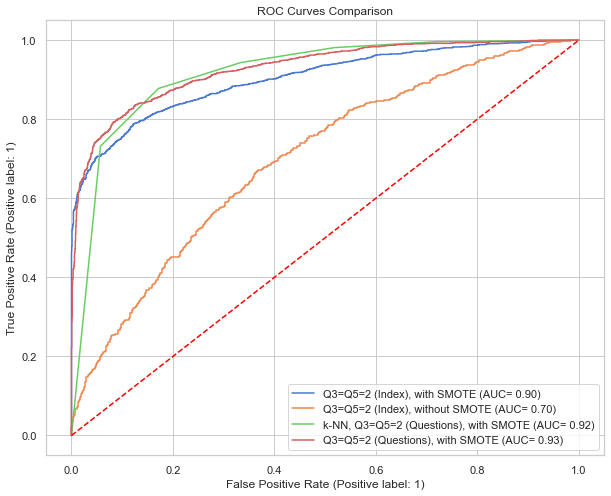

In [219]:
fig, ax= plt.subplots(figsize=(10, 8))
m.plot_roc_curve(rf_iqs2_sm, test_Xiqs2_sm, test_yiqs2_sm, ax= ax, label= "Q3=Q5=2 (Index), with SMOTE (AUC= 0.90)")
m.plot_roc_curve(rf_iqs2, test_Xiqs2, test_yiqs2, ax= ax, label= "Q3=Q5=2 (Index), without SMOTE (AUC= 0.70)")
m.plot_roc_curve(knn_mod_i2_sm, test_Xi2_sm, test_yi2_sm, ax= ax, label= "k-NN, Q3=Q5=2 (Questions), with SMOTE (AUC= 0.92)")
m.plot_roc_curve(rf_mod_i2_sm, test_Xi2_sm, test_yi2_sm, ax= ax, label= "Q3=Q5=2 (Questions), with SMOTE (AUC= 0.93)")
plt.plot([0,1],[0,1], 'k--', color= "red")
ax.set_title("ROC Curves Comparison")
plt.savefig("visualizations/roc/roc_curve_qs2.png", dpi=400)

#### Permutation Importance & ICE Plot

In [224]:
perm_train_i2= PermutationImportance(rf_mod_i2_sm, n_iter=25,random_state=123)
perm_train_i2.fit(test_Xi2_sm,test_yi2_sm)

PermutationImportance(estimator=RandomForestClassifier(max_depth=12,
                                                       n_estimators=1000),
                      n_iter=25, random_state=123)

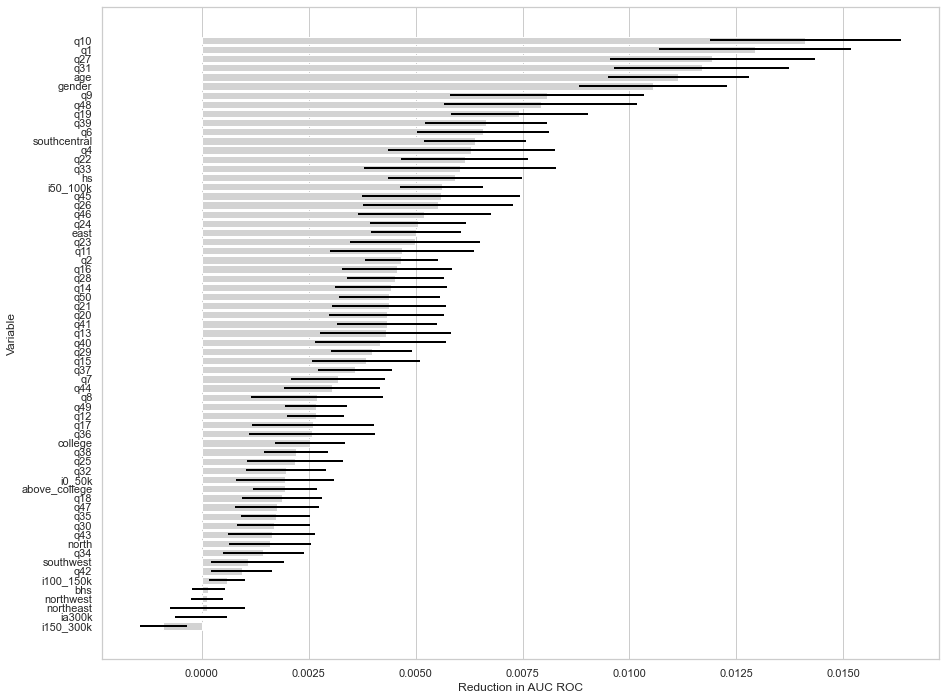

In [227]:
vi_i2= eli5.explain_weights_df(perm_train_i2,feature_names = list(train_Xi2_sm))

f,ax = plt.subplots(figsize=(15, 12))
sns.set_style("whitegrid")
sns.barplot(x="weight", y= "feature", data= vi_i2, color= "lightgray")
ax.errorbar(x= 'weight', y= "feature", xerr= 'std', data= vi_i2, ls= "None",
            ecolor= "black", capthick=0.2, elinewidth=2)
ax.set_xlabel("Reduction in AUC ROC")
ax.set_ylabel("Variable")
f.savefig("visualizations/pi/fi_i2_sm.png", dpi=400)

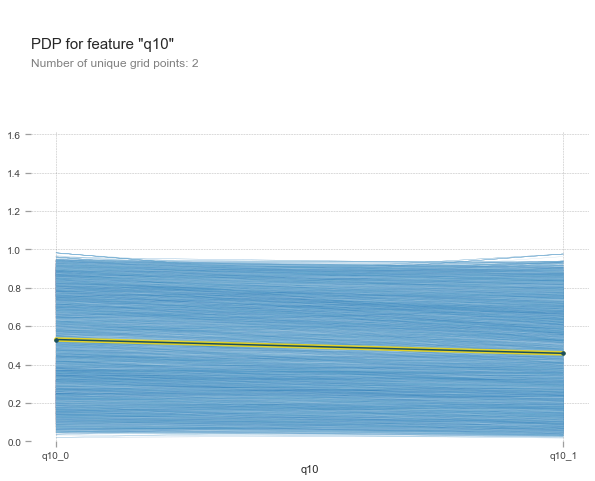

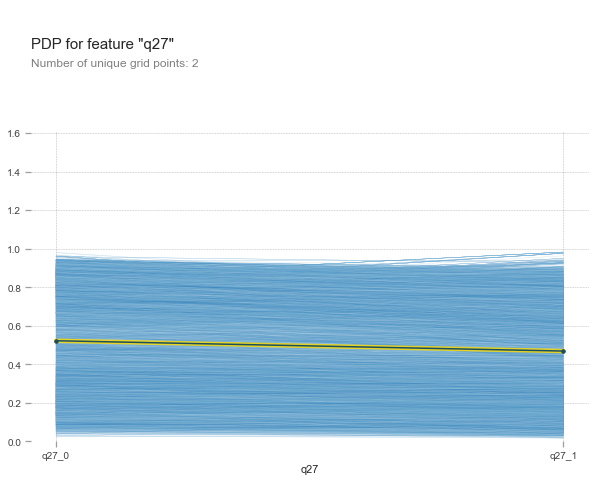

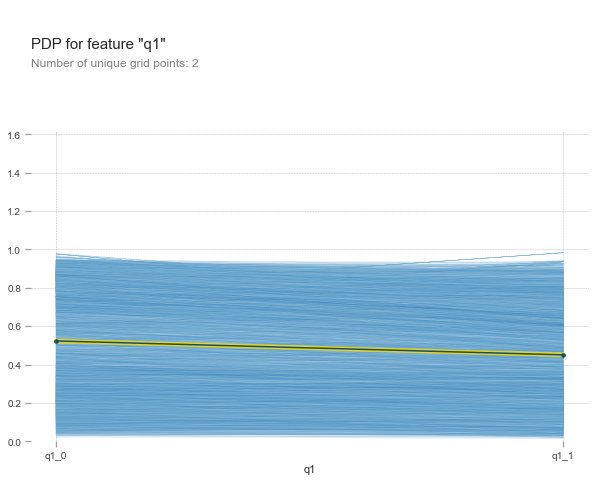

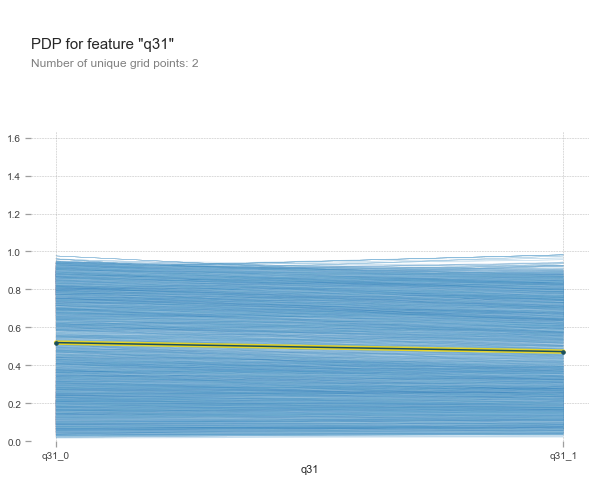

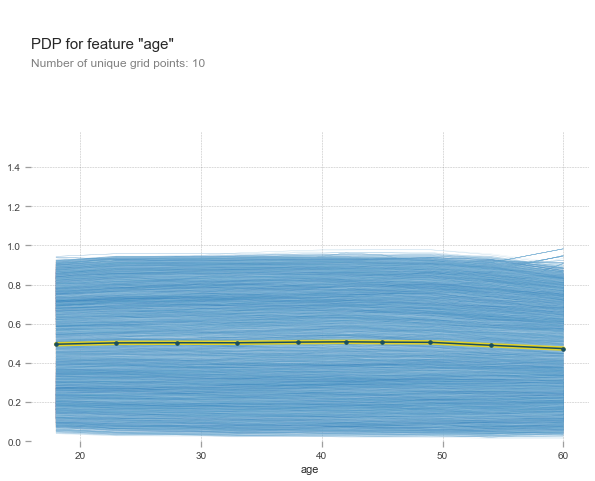

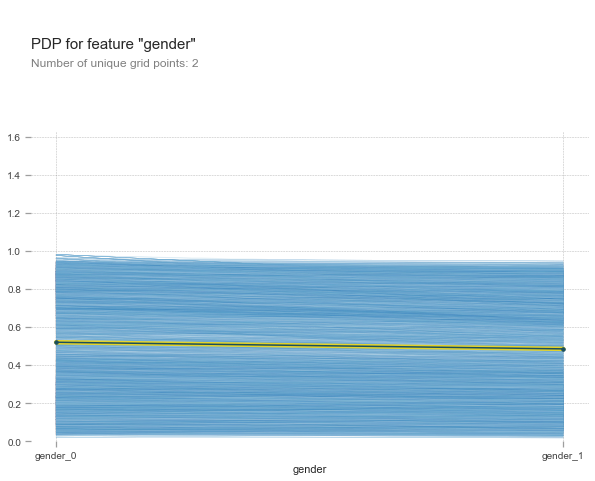

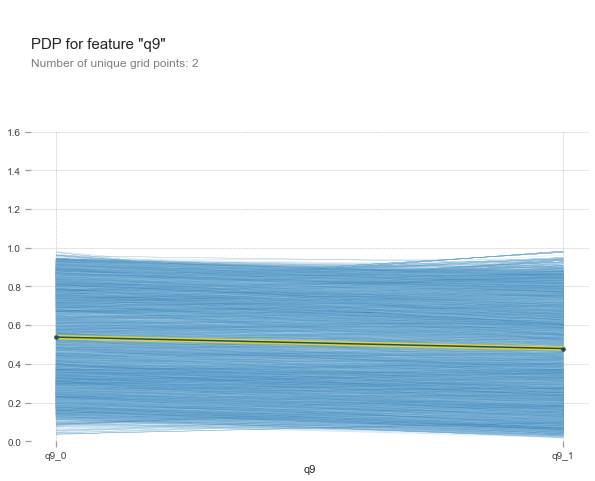

In [226]:
i2_list= ['q10', 'q27', 'q1', 'q31', 'age', 'gender', 'q9']
gen_ice_plot(rf_mod_i2_sm, i2_list, train_Xi2_sm, name= "i2_sm")